# Carbon instensity of Sustainable PV for Energy Transition
This analysis explores the carbon implications of different PV sustainability/circular economy designs in the context of achieving energy transition. These calculations build upon previous work that can be found in journals 13 and 17.

Attempt 1

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'CarbonAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
carbonfolder = str(Path().resolve().parent.parent / 'PV_ICE'/ 'baselines'/ 'CarbonLayer')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')
energyanalysisfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.11.5


In [3]:
import PV_ICE
PV_ICE.__version__

''

In [4]:
#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#000000', #PV ICE baseline
              '#595959', '#7F7F7F', '#A6A6A6', '#D9D9D9', #BAU, 4 grays, perc, shj, topcon, irena
              #'#067872','#0aa39e','#09d0cd','#00ffff', #realistic cases (4) teals, perc, shj, topcon, irena
              '#0579C1','#C00000','#FFC000', #extreme cases (3) long life, high eff, circular
                '#6E30A0','#00B3B5','#10C483', #ambitious modules (5) high eff+ long life, 50 yr perc, recycleSi, 
               '#97CB3F','#FF7E00' #circular perovskite+life, circular perovkiste+ high eff
                ] 

colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B', 'black'] #colors for material plots       

import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = ['PV_ICE','PERC','SHJ','TOPCon','Low\nQuality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff\n+ Long-life','Long-Life\n+ Recycling',
                         'Recycled-Si\n+ Long-life','Circular\n+ Long-life',
                        'Circular\n+ High Eff'
                    ]  

scennames_labels_flat = ['PV_ICE','PERC','SHJ','TOPCon','Low Quality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff + Long-life','Long-Life + Recycling',
                         'Recycled-Si + Long-life','Circular + Long-life',
                        'Circular + High Eff'
                    ] 

In [5]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [6]:
#load in the simulation from Energy Analysis journal
sim1 = PV_ICE.Simulation.load_Simpickle(filename=r'C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\sim1.pkl')

In [7]:
sim1.scenario['r_PERC'].dataOut_e

mod_MFG   mod_Install  mod_OandM  mod_Repair   mod_Demount  \
0    4.863319e+10  4.975550e+07        0.0         0.0  0.000000e+00   
1    2.235748e+10  2.262480e+07        0.0         0.0  3.178960e-01   
2    2.276802e+10  2.279250e+07        0.0         0.0  2.459434e+01   
3    3.488450e+10  3.455050e+07        0.0         0.0  3.030145e+02   
4    7.146432e+10  7.003504e+07        0.0         0.0  1.757212e+03   
..            ...           ...        ...         ...           ...   
96   2.571924e+13  7.212232e+10        0.0         0.0  5.900069e+10   
97   2.711413e+13  7.603390e+10        0.0         0.0  6.368335e+10   
98   1.544954e+13  4.332385e+10        0.0         0.0  2.405578e+10   
99   1.565010e+13  4.388628e+10        0.0         0.0  2.468097e+10   
100  1.592520e+13  4.465770e+10        0.0         0.0  2.555811e+10   

     mod_Store  mod_Resell_Certify  mod_ReMFG_Disassembly  mod_Recycle_Crush  \
0          0.0                 0.0                    0.0       0.000000e+00   
1          0.0                 0.0                    0.0       1.345202e+00   
2          0.0                 0.0                    0.0       1.040729e+02   
3          0.0                 0.0                    0.0       1.282230e+03   
4          0.0                 0.0                    0.0       7.435783e+03   
..         ...                 ...                    ...                ...   
96         0.0                 0.0                    0.0       2.964784e+12   
97         0.0                 0.0                    0.0       3.200089e+12   
98         0.0                 0.0                    0.0       1.208803e+12   
99         0.0                 0.0                    0.0       1.240219e+12   
100        0.0                 0.0                    0.0       1.284295e+12   

     e_out_annual_[Wh]  
0         1.198369e+12  
1         1.741612e+12  
2         2.289873e+12  
3         3.131165e+12  
4         4.863158e+12  
..                 ...  
96        1.355841e+17  
97        1.359336e+17  
98        1.362831e+17  
99        1.366325e+17  
100       1.369820e+17  

[101 rows x 10 columns]

<Axes: >

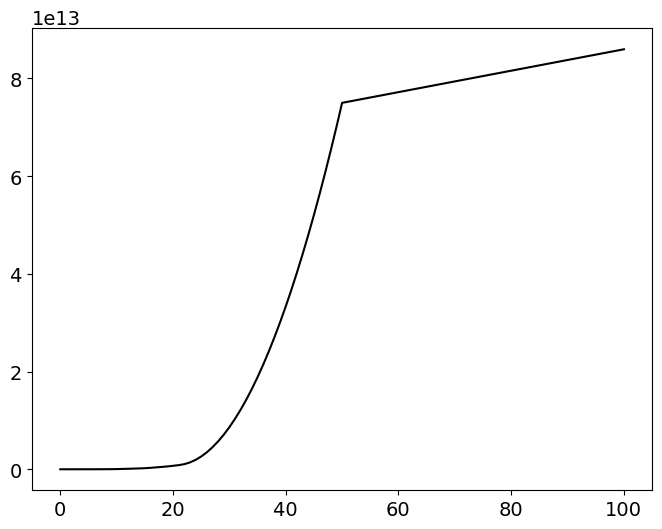

In [8]:
sim1.scenario['PV_ICE'].dataOut_m['Effective_Capacity_[W]'].plot()

## Project grid forward to 100% re in 2050
To parallel the PV deployment, we will assume that we globally hit 100% RE in 2050 with the 75 TW of PV. As such, we need to change the future projection of marketshares of the different country grids.

One scenario with decarb grid, one scenario with decarb grid and heat

Estimating that 60-70% generation will be from Solar, 30-40% from wind, and any remainder from "other renewables"

In [9]:
countrygridmix = pd.read_csv(os.path.join(carbonfolder,'baseline_countrygridmix.csv'), index_col='year')
gridsources = ['Bioenergy','Hydro','Nuclear','OtherFossil','OtherRenewables','Solar','Wind']
nonRE = ['Coal','Gas','OtherFossil','Nuclear','Bioenergy']

In [10]:
countrygridmix.loc[2023:,:]=np.nan #delete 2023 to 2050
nonRE_search = '|'.join(nonRE) #create nonRE search
countrygridmix.loc[2050, countrygridmix.columns.str.contains(nonRE_search)] = 0.0 #set all nonRE to 0 in 2050

In [11]:
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Solar')] = 63.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Wind')] = 33.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Hydro')] = 3.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('OtherRenewables')] = 1.0
#numbers derived from leading scenario electricity generation Breyer et al 2022 scenarios (EU focused)

In [12]:
countrygridmix_100RE2050 = countrygridmix.interpolate() #linearly interpolate between 2022 and 2050

In [13]:
apnd_idx = pd.RangeIndex(start=2051,stop=2101,step=1) #create temp df
apnd_df = pd.DataFrame(columns=countrygridmix_100RE2050.columns, index=apnd_idx )
countrygridmix_100RE20502100 = pd.concat([countrygridmix_100RE2050.loc[2000:],apnd_df], axis=0) #extend through 2100
countrygridmix_100RE20502100.ffill(inplace=True) #propogate 2050 values through 2100

In [14]:
countrygridmix_100RE20502100.loc[2050]

China_Bioenergy            0.0
China_Coal                 0.0
China_Gas                  0.0
China_Hydro                3.0
China_Nuclear              0.0
                          ... 
Zambia_Nuclear             0.0
Zambia_OtherFossil         0.0
Zambia_OtherRenewables     1.0
Zambia_Solar              63.0
Zambia_Wind               33.0
Name: 2050, Length: 472, dtype: float64

This is a simple projection, assumes all countries have same ratio of PV and wind (which we know can't be true). Update in future with country specific projections.

In [15]:
pd.read_csv(os.path.join(carbonfolder,'baseline_electricityemissionfactors.csv'), index_col=[0])

CO2eq_gpWh_IPCC2006  CO2eq_gpWh_ember  CO2_gpWh_EIA  \
Energy Source                                                          
Bioenergy                     0.3005             0.230        0.0000   
Coal                          0.3487             0.820        0.3215   
Gas                           0.2291             0.490        0.1805   
Hydro                         0.0000             0.024        0.0000   
Nuclear                       0.0000             0.012        0.0000   
OtherFossil                   0.2671             0.700        0.2413   
OtherRenewables               0.0000             0.038        0.0000   
Solar                         0.0000             0.048        0.0000   
Wind                          0.0000             0.011        0.0000   
SteamAndHeat                  0.0000             0.000        0.0000   

                 CO2_gpWh_EPA  
Energy Source                  
Bioenergy              0.3170  
Coal                   0.3380  
Gas                    0.1810  
Hydro                  0.0000  
Nuclear                0.0000  
OtherFossil            0.0000  
OtherRenewables        0.0000  
Solar                  0.0000  
Wind                   0.0000  
SteamAndHeat           0.2266

In [16]:
sim1.calculateCarbonFlows(countrygridmixes=countrygridmix_100RE20502100)



>>>> Calculating Carbon Flows <<<<

Working on Scenario:  PV_ICE
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_PERC
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_SHJ
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on C

# Carbon Analysis
this will become the aggregate carbon results function

In [17]:
scenarios = sim1.scenario

In [18]:
#simply group mod and mats carbon dfs by scenario
sim_carbon_dfs = pd.DataFrame()

for scen in scenarios:
    print(scen)
    mod_carbon_scen_results = sim1.scenario[scen].dataOut_c.add_prefix(str(scen+'_'))
    
    scenmatdc = pd.DataFrame()
    for mat in MATERIALS:
        print(mat)
        mat_carbon_scen_results = sim1.scenario[scen].material[mat].matdataOut_c.add_prefix(str(scen+'_'+mat+'_')) 
        scenmatdc = pd.concat([scenmatdc,mat_carbon_scen_results], axis=1) #group all material dc
    
    scen_carbon_results = pd.concat([mod_carbon_scen_results,scenmatdc], axis=1) #append mats to mod
    sim_carbon_dfs = pd.concat([sim_carbon_dfs, scen_carbon_results], axis=1) #append all scens "raw" data

#FIX INDEX of dfs
sim_carbon_dfs.index = pd.RangeIndex(start=2000,stop=2101,step=1)
    
#return sim_carbon_results, sim_annual_carbon

PV_ICE
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_SHJ
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_TOPCon
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_IRENA
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_High_eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Circular
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_EffLife
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_50PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_RecycledPERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_Eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
b

In [19]:
#Do math on the carbon dfs, take in the output aggregate sim df
sim_annual_carbon = pd.DataFrame()
for scen in scenarios:
    mod_mfg_carbon_total = sim_carbon_dfs.filter(like=scen).filter(like='Global_mod_MFG') #annual mfging elec carbon
    mod_nonvMFG = ['Install','OandM','Repair','Demount','Store','Resell','ReMFG','Recycle'] #could remove from loop
    nonvMFG_search = '|'.join(mod_nonvMFG) #create nonRE search
    mod_carbon_sum_nonvmfg = sim_carbon_dfs.loc[:,sim_carbon_dfs.columns.str.contains(nonvMFG_search)].filter(like=scen).filter(like='_mod_') #annual non mfging carbon
    scen_annual_carbon_mod = pd.concat([mod_mfg_carbon_total,mod_carbon_sum_nonvmfg], axis=1)
    scen_annual_carbon_mod[scen+'_Annual_Emit_mod_elec_gCO2eq'] = scen_annual_carbon_mod.sum(axis=1)

    scenmatdcmaths = pd.DataFrame()
    for mat in MATERIALS:
        scen_mat_dc_temp = sim_carbon_dfs.filter(like=scen).filter(like=mat)
        #calculation for annual carbon emissions total (selecting to avoid double countings)
        mat_global_vmfg_elec = scen_mat_dc_temp.filter(like='Global_vmfg_elec') #select global mod mfging
        mat_vmfg_countries = scen_mat_dc_temp.filter(like='vmfg_elec') #select country specific mod mfging, includes global
        mat_emit_lifecycle = scen_mat_dc_temp.loc[:,~scen_mat_dc_temp.columns.isin(mat_vmfg_countries.columns)] #select everything not the two above
        
        scen_mat_annual_carbon = pd.concat([mat_global_vmfg_elec,mat_emit_lifecycle], axis=1) #group global mod, lifecycle
        scen_mat_annual_carbon[scen+'_Annual_Emit_'+mat+'_gCO2eq'] = scen_mat_annual_carbon.sum(axis=1) #sum annual emit
        
        scenmatdcmaths = pd.concat([scenmatdcmaths,scen_mat_annual_carbon], axis=1)
        #add by material
        #add by process, fuel, elec
        
        #mat_ce_recycle = mat_carbon_scen_results.filter(like='Recycle_e_p')
        #mat_ce_remfg = mat_carbon_scen_results.filter(like='ReMFG_clean')
        #mat_landfill = mat_carbon_scen_results.filter(like='landfill_total')
        #mat_scen_annual_carbon = pd.concat([mat_vmfg_total,mat_ce_recycle,mat_ce_remfg,mat_landfill], axis=1)
    scen_modmat_annual_carbon = pd.concat([scen_annual_carbon_mod,scenmatdcmaths], axis=1)
    scen_modmat_annual_carbon[scen+'_Annual_Emit_total_modmats_gCO2eq'] = scen_modmat_annual_carbon.filter(like='Annual_Emit').sum(axis=1)
    
    sim_annual_carbon = pd.concat([sim_annual_carbon, scen_modmat_annual_carbon], axis=1)


    #FIX INDEX of dfs
sim_annual_carbon.index = pd.RangeIndex(start=2000,stop=2101,step=1)


In [20]:
#create cumulative
sim_cumu_carbon = sim_annual_carbon.cumsum()
maxy = round(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats_gCO2eq').max()/1e12,-3) #for graphing
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats_gCO2eq')

PV_ICE_Annual_Emit_total_modmats_gCO2eq               3.121754e+16
r_PERC_Annual_Emit_total_modmats_gCO2eq               2.353916e+16
r_SHJ_Annual_Emit_total_modmats_gCO2eq                2.240814e+16
r_TOPCon_Annual_Emit_total_modmats_gCO2eq             2.288106e+16
r_IRENA_Annual_Emit_total_modmats_gCO2eq              3.463484e+16
ex_Life_Annual_Emit_total_modmats_gCO2eq              2.391658e+16
ex_High_eff_Annual_Emit_total_modmats_gCO2eq          3.216982e+16
ex_Circular_Annual_Emit_total_modmats_gCO2eq          2.922419e+16
h_EffLife_Annual_Emit_total_modmats_gCO2eq            2.415674e+16
h_50PERC_Annual_Emit_total_modmats_gCO2eq             2.406553e+16
h_RecycledPERC_Annual_Emit_total_modmats_gCO2eq       2.549763e+16
h_Perovskite_life_Annual_Emit_total_modmats_gCO2eq    2.857890e+16
h_Perovskite_Eff_Annual_Emit_total_modmats_gCO2eq     2.496506e+16
Name: 2100, dtype: float64

In [73]:
#save the carbondataframe as csvs for now
sim_annual_carbon.to_csv(os.path.join(testfolder,'13scen_carbon_annual.csv'))
sim_cumu_carbon.to_csv(os.path.join(testfolder,'13scen_carbon_cumu.csv'))


# Carbon Emissions Cumulative Scenario compare

In [21]:
sim_cumu_carbon_mmt = sim_cumu_carbon.filter(like='Annual_Emit_total_modmats_gCO2eq')/1e12
sim_cumu_carbon_mmt

PV_ICE_Annual_Emit_total_modmats_gCO2eq  \
2000                                 1.481254   
2001                                 1.969319   
2002                                 2.491843   
2003                                 3.202322   
2004                                 4.482671   
...                                       ...   
2096                             29946.334571   
2097                             30235.166486   
2098                             30542.400774   
2099                             30868.293463   
2100                             31217.536154   

      r_PERC_Annual_Emit_total_modmats_gCO2eq  \
2000                                 1.287445   
2001                                 1.831833   
2002                                 2.320173   
2003                                 2.984171   
2004                                 4.180758   
...                                       ...   
2096                             22943.053440   
2097                             23141.758362   
2098                             23272.836530   
2099                             23405.159527   
2100                             23539.161252   

      r_SHJ_Annual_Emit_total_modmats_gCO2eq  \
2000                                1.236643   
2001                                1.795795   
2002                                2.275174   
2003                                2.926989   
2004                                4.101619   
...                                      ...   
2096                            21841.103875   
2097                            22030.114277   
2098                            22154.799955   
2099                            22280.669697   
2100                            22408.136215   

      r_TOPCon_Annual_Emit_total_modmats_gCO2eq  \
2000                                   1.261809   
2001                                   1.813647   
2002                                   2.297465   
2003                                   2.955316   
2004                                   4.140822   
...                                         ...   
2096                               22301.936567   
2097                               22494.977052   
2098                               22622.321080   
2099                               22750.874420   
2100                               22881.058587   

      r_IRENA_Annual_Emit_total_modmats_gCO2eq  \
2000                                  1.481254   
2001                                  1.969320   
2002                                  2.491843   
2003                                  3.202320   
2004                                  4.482653   
...                                        ...   
2096                              32802.838676   
2097                              33260.576285   
2098                              33719.822528   
2099                              34177.160162   
2100                              34634.843812   

      ex_Life_Annual_Emit_total_modmats_gCO2eq  \
2000                                  1.381072   
2001                                  1.898252   
2002                                  2.403105   
2003                                  3.089558   
2004                                  4.326610   
...                                        ...   
2096                              21807.659488   
2097                              22308.267689   
2098                              22827.925129   
2099                              23364.909841   
2100                              23916.578052   

      ex_High_eff_Annual_Emit_total_modmats_gCO2eq  \
2000                                      1.231665   
2001                                      1.792263   
2002                                      2.270765   
2003                                      2.921386   
2004                                      4.093865   
...                                            ...   
2096                                  29778.276247   
2097

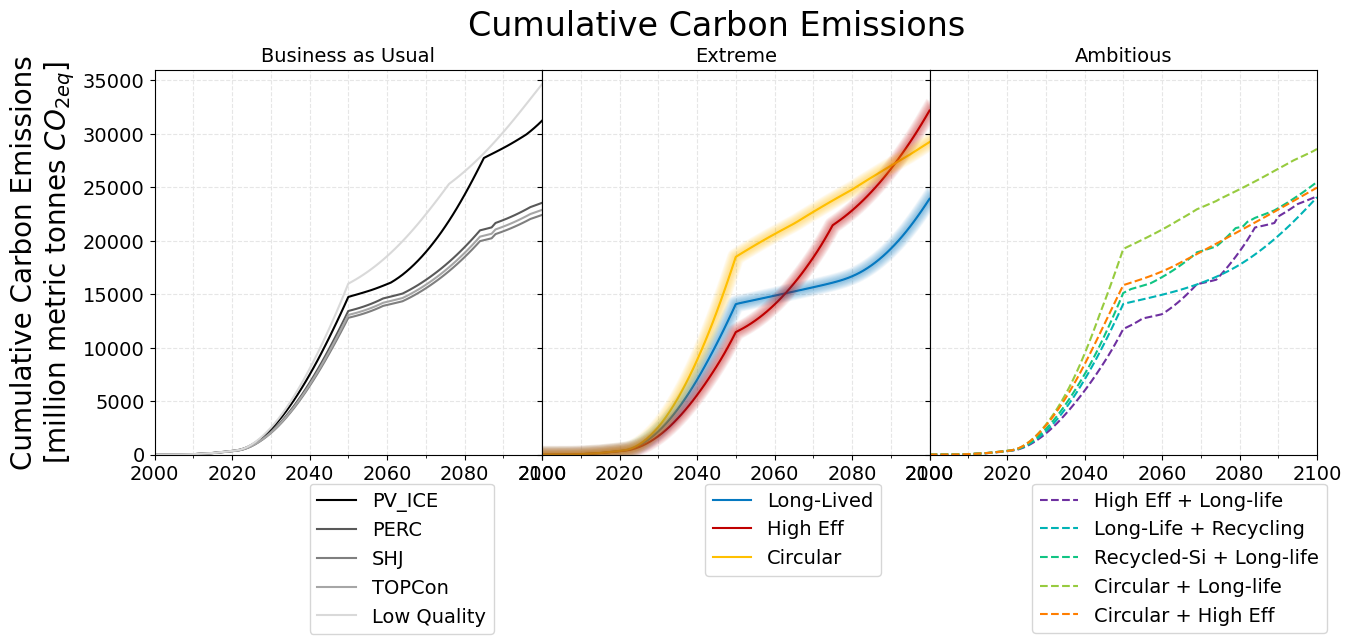

In [22]:

fig_cumu_carbon, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5), sharey=True, sharex=True, 
                                      gridspec_kw={'wspace':0})

#BAU
ax1.set_prop_cycle(color=colorpalette[0:5])
ax1.plot(sim_cumu_carbon_mmt.iloc[:,0:5], label=scennames_labels_flat[0:5]) # baselines
ax1.set_title('Business as Usual', fontsize=14)
ax1.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax1.set_xlim(2000,2100)
ax1.legend(bbox_to_anchor=(0.9,-0.05))
ax1.set_ylim(0,maxy+1000)
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.grid(axis='both', which='both', color='0.9', ls='--') 


#Extreme
ax2.set_prop_cycle(color=colorpalette[5:8])

ax2.plot(sim_cumu_carbon_mmt.iloc[:,5:8], label=scennames_labels_flat[5:8])
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.grid(axis='both', which='both', color='0.9', ls='--') 

#create glowlines for Extreme scens
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.05
for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,5],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[5])

for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,6],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[6])

for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,7],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[7])

ax2.set_title('Extreme', fontsize=14)
ax2.legend(bbox_to_anchor=(0.9,-0.05))

#Ambitious
ax3.set_prop_cycle(color=colorpalette[8:])
ax3.plot(sim_cumu_carbon_mmt.iloc[:,8:], label=scennames_labels_flat[8:], ls='--')# 
ax3.set_title('Ambitious', fontsize=14)
ax3.legend(bbox_to_anchor=(1.05,-0.05)) #(x,y)
ax3.xaxis.set_minor_locator(MultipleLocator(10))
ax3.grid(axis='both', which='both', color='0.9', ls='--') 

#overall figure

fig_cumu_carbon.suptitle('Cumulative Carbon Emissions', fontsize=24, y=1)
plt.show()
#fig_cumu_carbon.savefig('energyresults-annualMatDemands-decade.png', dpi=300, bbox_inches='tight')

# Literature Validation

In [23]:
#comparing to Ember open source data, uses a lifecycle PV emission factor from IPCC for electricity carbon
ember_PVCO2 = pd.read_csv(os.path.join(carbonfolder,'Ember-PVEmissionsWorld2000-2022.csv'), index_col='year')
#ember_PVCO2['emissions_mtco2'] #ANNUAL DATA
ember_PVCO2_cumu = ember_PVCO2.cumsum()

In [24]:
#compare to Fthenakis and Leccisi 2021 analysis
FL2021_gwp_scSi2020 = 1010 #kg CO2eq/kWp from Fthenakis and Leccisi 2021 "sc_Si 2020"
FL2021_gwp_scSi2015 = 2000 #"scSi 2015"
FL2021_gwp_mcSi2020 = 1087 #mcSi 2020
FL2021_gwp_mcSi2015 = 1435 #mcSi 2015

kw_installed_pvice = sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']*1000 # kW installed

FL2021_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
FL2021_gwp_range['F&L_sc-Si_2020'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_scSi2020
FL2021_gwp_range['F&L_sc-Si_2015'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_scSi2015
FL2021_gwp_range['F&L_mc-Si_2020'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_mcSi2020
FL2021_gwp_range['F&L_mc-Si_2015'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_mcSi2015

FL2021_gwp_range_cumu_mmt = FL2021_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

In [25]:
#compare to Ultra Low Carbon Solar Alliance South Korea rating, as redproduced in Polverini 2023
Polverini2023_low = 550 #kg CO2eq/kWp "France"
Polverini2023_high = 762 #kg CO2eq/kWp "China"

kw_installed_pvice = sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']*1000 # kW installed

Polverini2023_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
Polverini2023_gwp_range['Polverini2023_low'] = kw_installed_pvice.loc[:22].values*Polverini2023_low
Polverini2023_gwp_range['Polverini2023_high'] = kw_installed_pvice.loc[:22].values*Polverini2023_high

Polverini2023_gwp_range_cumu_mmt = Polverini2023_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

In [26]:
#compare to Liang and You 2023, using Figure 1 2020 values from a and e
LiangYou2023_scSi_low = 250 #kg CO2eq/m2 ""
LiangYou2023_scSi_high = 350 #kg CO2eq/m2 ""
LiangYou2023_mcSi_low = 210
LiangYou2023_mcSi_high = 300

m2_installed_pvice = sim1.scenario['PV_ICE'].dataOut_m['Area'] # area deployed in m2

LiangYou2023_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
LiangYou2023_gwp_range['LiangYou2023_scSi_low'] = m2_installed_pvice.loc[:22].values*LiangYou2023_scSi_low
LiangYou2023_gwp_range['LiangYou2023_scSi_high'] = m2_installed_pvice.loc[:22].values*LiangYou2023_scSi_high
LiangYou2023_gwp_range['LiangYou2023_mcSi_low'] = m2_installed_pvice.loc[:22].values*LiangYou2023_mcSi_low
LiangYou2023_gwp_range['LiangYou2023_mcSi_high'] = m2_installed_pvice.loc[:22].values*LiangYou2023_mcSi_high

LiangYou2023_gwp_range_cumu_mmt = LiangYou2023_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

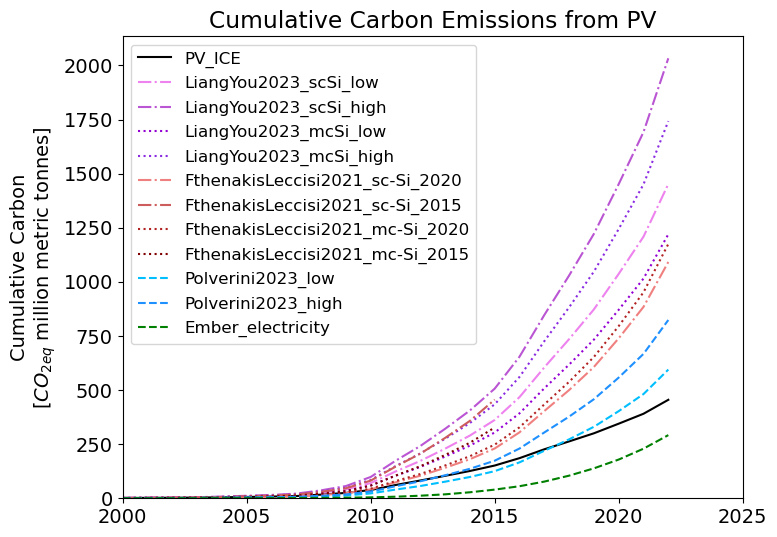

In [27]:
plt.plot(sim_cumu_carbon_mmt.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq'], label='PV_ICE', color='black')

plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_scSi_low'], label='LiangYou2023_scSi_low', color='violet', ls='-.')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_scSi_high'], label='LiangYou2023_scSi_high', color='mediumorchid', ls='-.')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_mcSi_low'], label='LiangYou2023_mcSi_low', color='darkviolet', ls=':')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_mcSi_high'], label='LiangYou2023_mcSi_high', color='blueviolet', ls=':')

plt.plot(FL2021_gwp_range_cumu_mmt['F&L_sc-Si_2020'], label='FthenakisLeccisi2021_sc-Si_2020', color='lightcoral', ls='-.')
plt.plot(FL2021_gwp_range_cumu_mmt.loc[:2015,'F&L_sc-Si_2015'], label='FthenakisLeccisi2021_sc-Si_2015', color='indianred', ls='-.')
plt.plot(FL2021_gwp_range_cumu_mmt['F&L_mc-Si_2020'], label='FthenakisLeccisi2021_mc-Si_2020', color='firebrick', ls='dotted')
plt.plot(FL2021_gwp_range_cumu_mmt.loc[:2015,'F&L_mc-Si_2015'], label='FthenakisLeccisi2021_mc-Si_2015', color='maroon', ls='dotted')

plt.plot(Polverini2023_gwp_range_cumu_mmt['Polverini2023_low'], label='Polverini2023_low', color='deepskyblue', ls='--')
plt.plot(Polverini2023_gwp_range_cumu_mmt['Polverini2023_high'], label='Polverini2023_high', color='dodgerblue', ls='--')

plt.plot(ember_PVCO2_cumu.index, ember_PVCO2_cumu['emissions_mtco2'], label='Ember_electricity', color='green', ls='--')

plt.ylabel('Cumulative Carbon\n[$CO_{2eq}$ million metric tonnes]')
plt.title('Cumulative Carbon Emissions from PV')
plt.xlim(2000,2025)
plt.ylim(0,)
plt.legend(loc='upper left', fontsize=12)

## Flip it, compare on CO2eq/kWp
This is a simple way of doing it, will not work for much beyond 2022, because the annual emissions include end of life of other systems, not just the mfging of installed - its not necessarily fair. Might work out on balance, kinda

In [28]:
#lit factors into scatter points
litfactors = pd.DataFrame(index=ember_PVCO2_cumu.index)

litfactors.loc[2022,'Polverini2023_low'] = Polverini2023_low
litfactors.loc[2022,'Polverini2023_high'] = Polverini2023_high
litfactors.loc[2020,'FthenakisLeccisi2021_scSi'] = FL2021_gwp_scSi2020 
litfactors.loc[2015,'FthenakisLeccisi2021_scSi'] = FL2021_gwp_scSi2015 
litfactors.loc[2020,'FthenakisLeccisi2021_mcSi'] = FL2021_gwp_mcSi2020
litfactors.loc[2015,'FthenakisLeccisi2021_mcSi'] = FL2021_gwp_mcSi2015

litfactors.loc[2020,'LiangYou2023_scSi_m$^{2}$'] = LiangYou2023_scSi_low #kg CO2eq/m2 ""
litfactors.loc[2019,'LiangYou2023_scSi_m$^{2}$'] = LiangYou2023_scSi_high  #kg CO2eq/m2 ""
litfactors.loc[2020,'LiangYou2023_mcSi_m$^{2}$'] = LiangYou2023_mcSi_low 
litfactors.loc[2019,'LiangYou2023_mcSi_m$^{2}$'] = LiangYou2023_mcSi_high

litfactors.loc[2015,'Anctil2021_low'] = 1010
litfactors.loc[2015,'Anctil2021_high'] = 1775
litfactors.loc[2020,'Anctil2021_low'] = 500
litfactors.loc[2020,'Anctil2021_high'] = 750

litfactors.loc[2005,'Jungbluth2005_scSi_m$^{2}$'] = 170 #scSi CO2fossil, might be just module not full lifecycle

litfactors.loc[2020,'Wikoff2022_low_m$^{2}$'] = 125
litfactors.loc[2020,'Wikoff2022_high_m$^{2}$'] = 275


#litfactors

In [29]:
#calculate CO2eq/kWp by dividing annual CO2eq/deployed PV
installs = pd.DataFrame(kw_installed_pvice.loc[:22])
installs.index = ember_PVCO2_cumu.index

pvice_emit_annual = sim_annual_carbon.filter(like='PV_ICE').filter(like='Annual_Emit_total_modmats_gCO2eq').loc[:2022]
pvice_annual_kgco2pkwp = pvice_emit_annual['PV_ICE_Annual_Emit_total_modmats_gCO2eq'].div(installs['new_Installed_Capacity_[MW]'], axis=0)/1e3
#pvice_annual_kgco2pkwp

In [30]:
#calculate CO2eq/m2 for PV ICE
meters2installs = pd.DataFrame(m2_installed_pvice.loc[:22])
meters2installs.index = ember_PVCO2_cumu.index

pvice_annual_kgco2eqpm2 = pvice_emit_annual['PV_ICE_Annual_Emit_total_modmats_gCO2eq'].div(meters2installs['Area'], axis=0)/1e3
#pvice_annual_kgco2eqpm2

In [31]:
litfactors.columns

Index(['Polverini2023_low', 'Polverini2023_high', 'FthenakisLeccisi2021_scSi',
       'FthenakisLeccisi2021_mcSi', 'LiangYou2023_scSi_m$^{2}$',
       'LiangYou2023_mcSi_m$^{2}$', 'Anctil2021_low', 'Anctil2021_high',
       'Jungbluth2005_scSi_m$^{2}$', 'Wikoff2022_low_m$^{2}$',
       'Wikoff2022_high_m$^{2}$'],
      dtype='object')

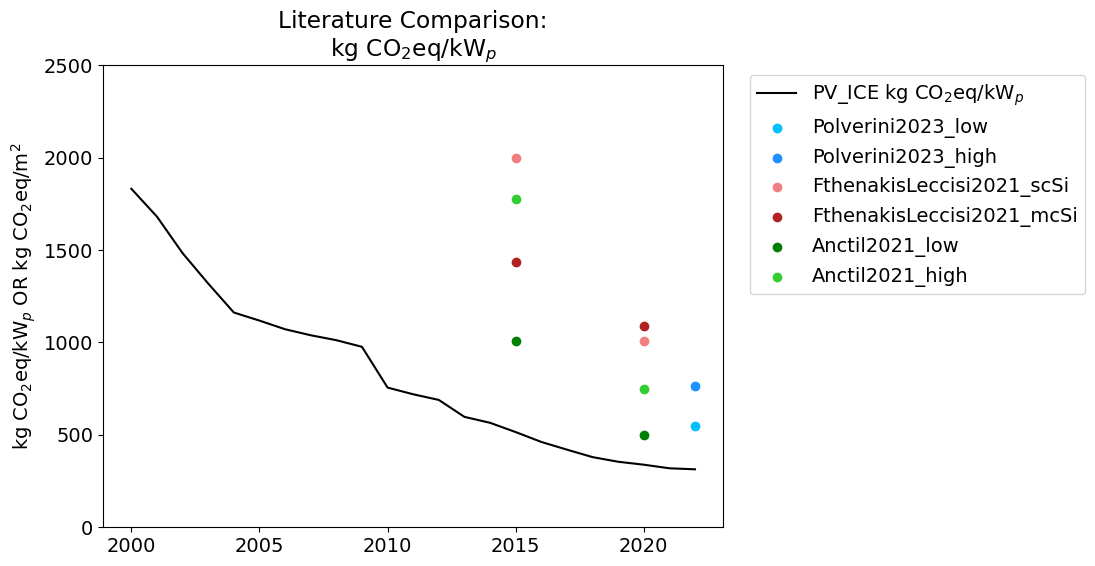

In [32]:
#graphing

plt.plot(pvice_annual_kgco2pkwp, label='PV_ICE kg CO$_{2}$eq/kW$_{p}$', color='black')

plt.scatter(litfactors.index, litfactors['Polverini2023_low'], label='Polverini2023_low', color='deepskyblue')
plt.scatter(litfactors.index, litfactors['Polverini2023_high'], label='Polverini2023_high', color='dodgerblue')

plt.scatter(litfactors.index, litfactors['FthenakisLeccisi2021_scSi'], label='FthenakisLeccisi2021_scSi', color='lightcoral')
plt.scatter(litfactors.index, litfactors['FthenakisLeccisi2021_mcSi'], label='FthenakisLeccisi2021_mcSi', color='firebrick')

plt.scatter(litfactors.index, litfactors['Anctil2021_low'], label='Anctil2021_low', color='green')
plt.scatter(litfactors.index, litfactors['Anctil2021_high'], label='Anctil2021_high', color='limegreen')


#plt.plot(pvice_annual_kgco2eqpm2, label='PV_ICE kg CO$_{2}$eq/m$^{2}$', color='darkgray', marker='^')

#plt.scatter(litfactors.index, litfactors['LiangYou2023_scSi_m$^{2}$'], label='LiangYou2023_scSi_m$^{2}$', color='violet', marker='^')
#plt.scatter(litfactors.index, litfactors['LiangYou2023_mcSi_m$^{2}$'], label='LiangYou2023_mcSi_m$^{2}$', color='darkviolet', marker='^')

#plt.scatter(litfactors.index, litfactors['Jungbluth2005_scSi_m$^{2}$'], label='Jungbluth2005_scSi_m$^{2}$', color='orange', marker='^')
plt.ylim(0,2500)
plt.ylabel('kg CO$_{2}$eq/kW$_{p}$ OR kg CO$_{2}$eq/m$^{2}$')
plt.title('Literature Comparison:\nkg CO$_{2}$eq/kW$_{p}$')
plt.legend(bbox_to_anchor=(1.6,1))

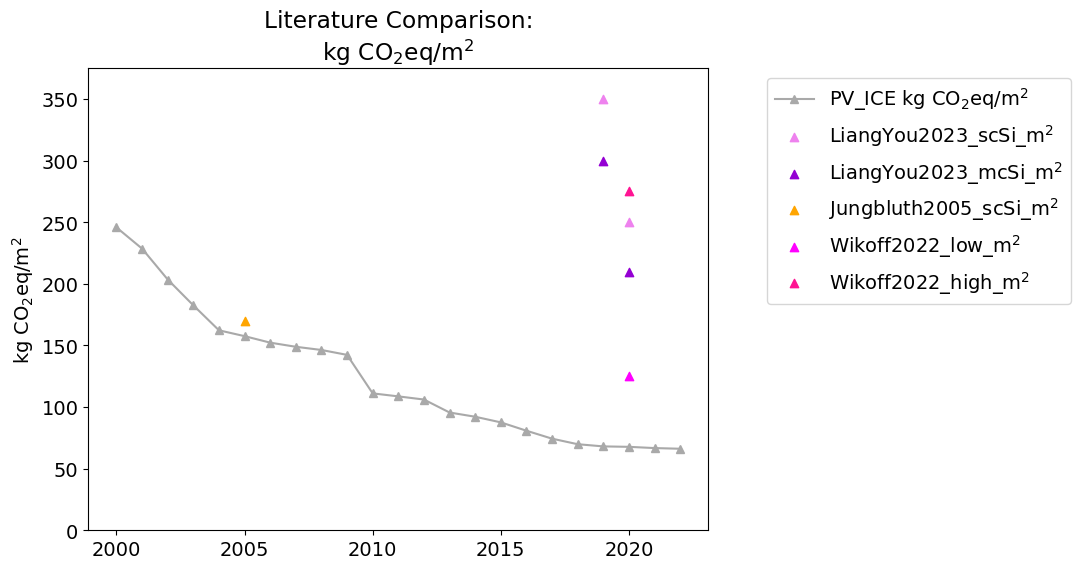

In [33]:
plt.plot(pvice_annual_kgco2eqpm2, label='PV_ICE kg CO$_{2}$eq/m$^{2}$', color='darkgray', marker='^')

plt.scatter(litfactors.index, litfactors['LiangYou2023_scSi_m$^{2}$'], label='LiangYou2023_scSi_m$^{2}$', color='violet', marker='^')
plt.scatter(litfactors.index, litfactors['LiangYou2023_mcSi_m$^{2}$'], label='LiangYou2023_mcSi_m$^{2}$', color='darkviolet', marker='^')

plt.scatter(litfactors.index, litfactors['Jungbluth2005_scSi_m$^{2}$'], label='Jungbluth2005_scSi_m$^{2}$', color='orange', marker='^')

plt.scatter(litfactors.index, litfactors['Wikoff2022_low_m$^{2}$'], label='Wikoff2022_low_m$^{2}$', color='fuchsia', marker='^')
plt.scatter(litfactors.index, litfactors['Wikoff2022_high_m$^{2}$'], label='Wikoff2022_high_m$^{2}$', color='deeppink', marker='^')

plt.ylim(0,375)
plt.ylabel('kg CO$_{2}$eq/m$^{2}$')
plt.title('Literature Comparison:\nkg CO$_{2}$eq/m$^{2}$')
plt.legend(bbox_to_anchor=(1.6,1))

# Contextualize versus Global Carbon Emissions and Budget

In [34]:
annualco2emitglobal_raw = pd.read_csv(os.path.join(carbonfolder,'WorldInData-annual-co2-emissions-per-country.csv'))
annualco2emitglobal_subset = annualco2emitglobal_raw.loc[(annualco2emitglobal_raw['Entity']=='World')&(annualco2emitglobal_raw['Year']>=2000), 'Year':]
annualco2emitglobal_subset.index=annualco2emitglobal_subset['Year']

#create % PV emit vs world
pvice_annualPVemit_bmt = sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15 #bmt
world_annual_bmt = annualco2emitglobal_subset.iloc[:,1]/1e9 #bmt

percentPVemitvsWorld = pvice_annualPVemit_bmt/world_annual_bmt*100

In [35]:
#cumulative compare
sim_cumu_carbon_bmt = sim_cumu_carbon_mmt.loc[:,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e3
sim_cumu_carbon_bmt

2000     0.001481
2001     0.001969
2002     0.002492
2003     0.003202
2004     0.004483
          ...    
2096    29.946335
2097    30.235166
2098    30.542401
2099    30.868293
2100    31.217536
Name: PV_ICE_Annual_Emit_total_modmats_gCO2eq, Length: 101, dtype: float64

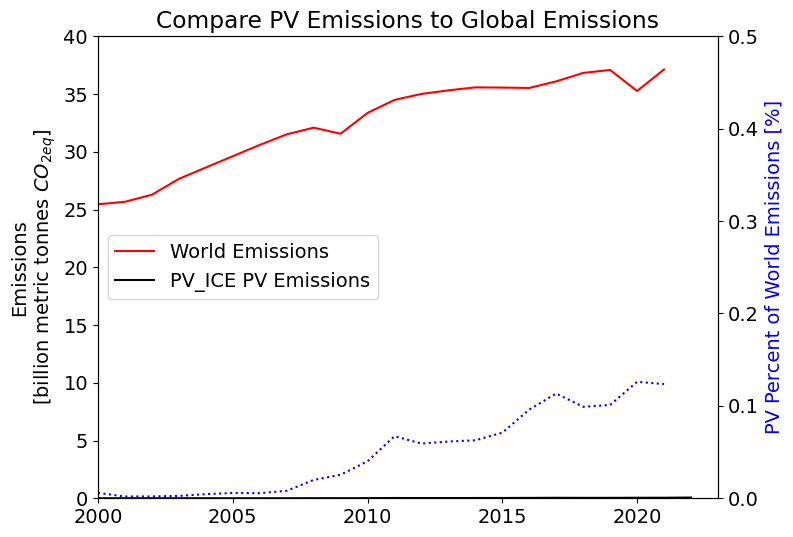

In [36]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'World Emissions', color='red') #bmt
ax1.plot(sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15,
         label='PV_ICE PV Emissions', color='black')
ax1.set_ylim(0,40)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2023)

ax2 = ax1.twinx()
ax2.plot(percentPVemitvsWorld,ls=':', color='blue')
ax2.set_ylabel('PV Percent of World Emissions [%]', color='blue')
ax2.set_ylim(0,0.5)
#ax2.set_xlim(2000,2022)

plt.title('Compare PV Emissions to Global Emissions')
ax1.legend(loc='center left')
plt.show()

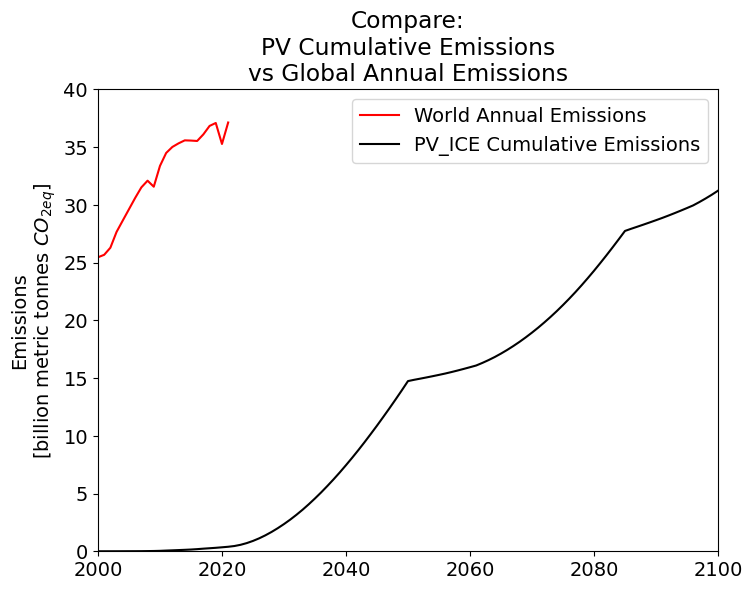

In [37]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'World Annual Emissions', color='red') #bmt
ax1.plot(sim_cumu_carbon_bmt, label='PV_ICE Cumulative Emissions', color='black')
ax1.set_ylim(0,40)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2100)

#ax2 = ax1.twinx()
#ax2.plot(percentPVemitvsWorld,ls=':', color='blue')
#ax2.set_ylabel('PV Percent of World Emissions [%]', color='blue')
#ax2.set_ylim(0,0.5)
#ax2.set_xlim(2000,2022)

plt.title('Compare:\nPV Cumulative Emissions\nvs Global Annual Emissions')
ax1.legend(loc='upper right')
plt.show()

In [70]:
annualEmitGlobal_SSPs = pd.read_csv(os.path.join(supportMatfolder,'CarbonIntensities','input-CarbonEmitProjections-SSP15.csv'),
                                   skiprows=1, index_col=0)

In [71]:
annualEmitGlobal_SSPs.iloc[:,0:2] = annualEmitGlobal_SSPs.iloc[:,0:2].interpolate()
#as percent of global emit scenarios SSPs
pvice_annualPVemit_full_bmt = sim_annual_carbon.loc[:,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15
percentPVemitvsWorld_SSP1 = pvice_annualPVemit_full_bmt/annualEmitGlobal_SSPs['SSP1_IMAGE_[GtCO2eq/year]']*100
percentPVemitvsWorld_SSP5 = pvice_annualPVemit_full_bmt/annualEmitGlobal_SSPs['SSP5_REMIND_[GtCO2eq/year]']*100


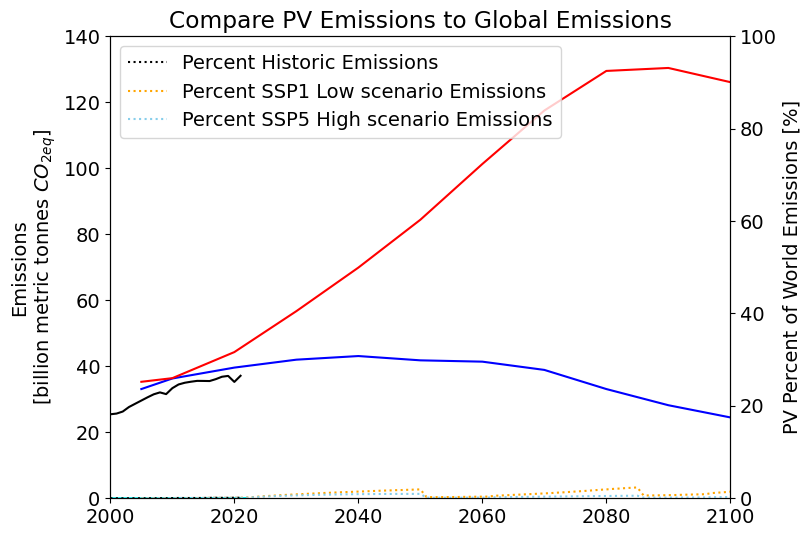

In [72]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'Historical World Emissions', color='black') #bmt

ax1.plot(annualEmitGlobal_SSPs['SSP1_IMAGE_[GtCO2eq/year]'], label='SSP1', color='blue')
ax1.plot(annualEmitGlobal_SSPs['SSP5_REMIND_[GtCO2eq/year]'], label='SSP5', color='red')

ax1.plot(sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15,
         label='PV_ICE PV Emissions', color='aqua')
ax1.set_ylim(0,140)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2100)

ax2 = ax1.twinx()
ax2.plot(percentPVemitvsWorld, label='Percent Historic Emissions', ls=':', color='black')
ax2.plot(percentPVemitvsWorld_SSP1, label='Percent SSP1 Low scenario Emissions', ls=':', color='orange')
ax2.plot(percentPVemitvsWorld_SSP5, label='Percent SSP5 High scenario Emissions', ls=':', color='skyblue')

percentPVemitvsWorld_SSP1
ax2.set_ylabel('PV Percent of World Emissions [%]')
ax2.set_ylim(0,100)
#ax2.set_xlim(2000,2022)

plt.title('Compare PV Emissions to Global Emissions')
plt.legend(loc='upper left')
plt.show()

# Cabon Emissions by material or module

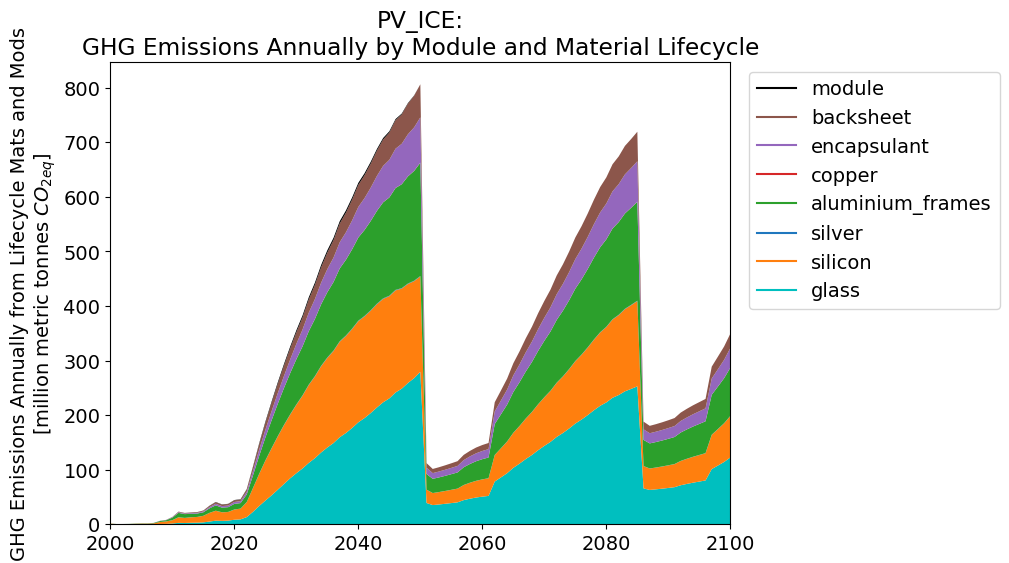

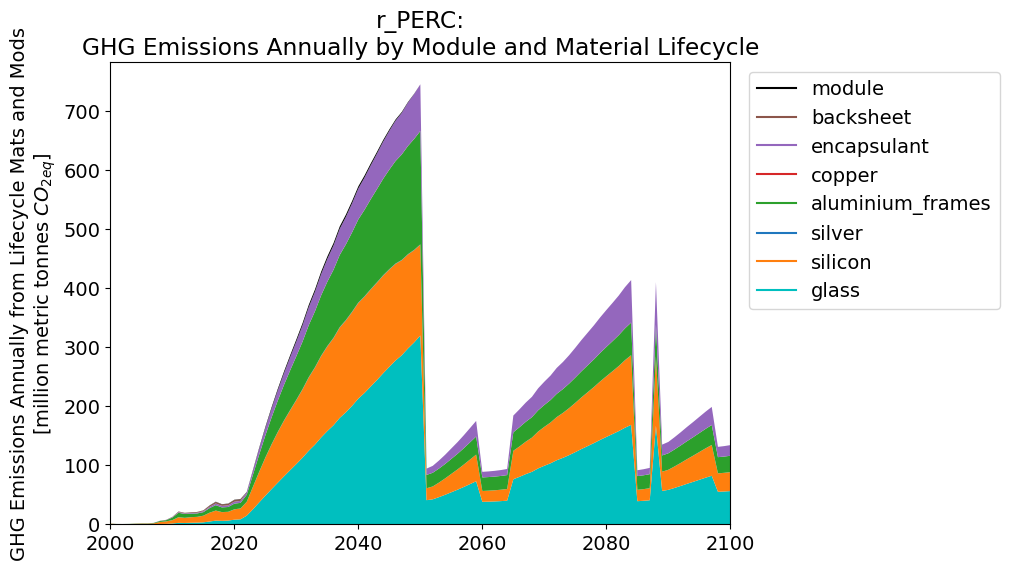

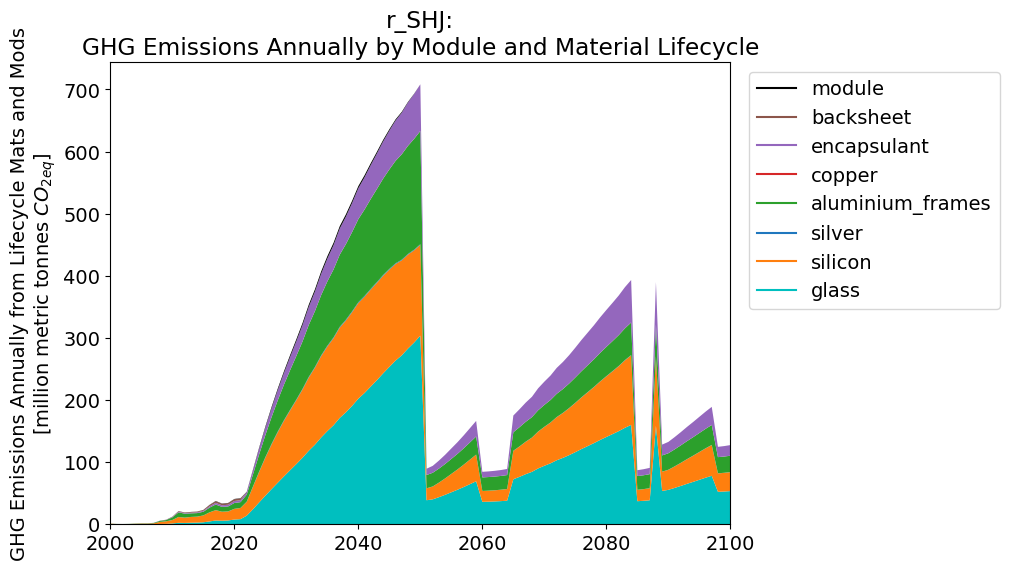

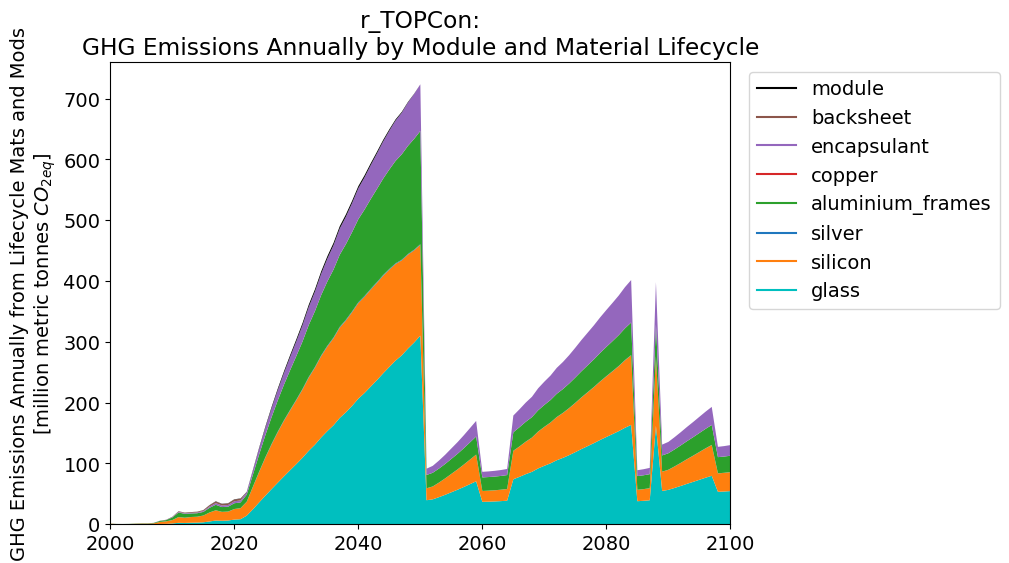

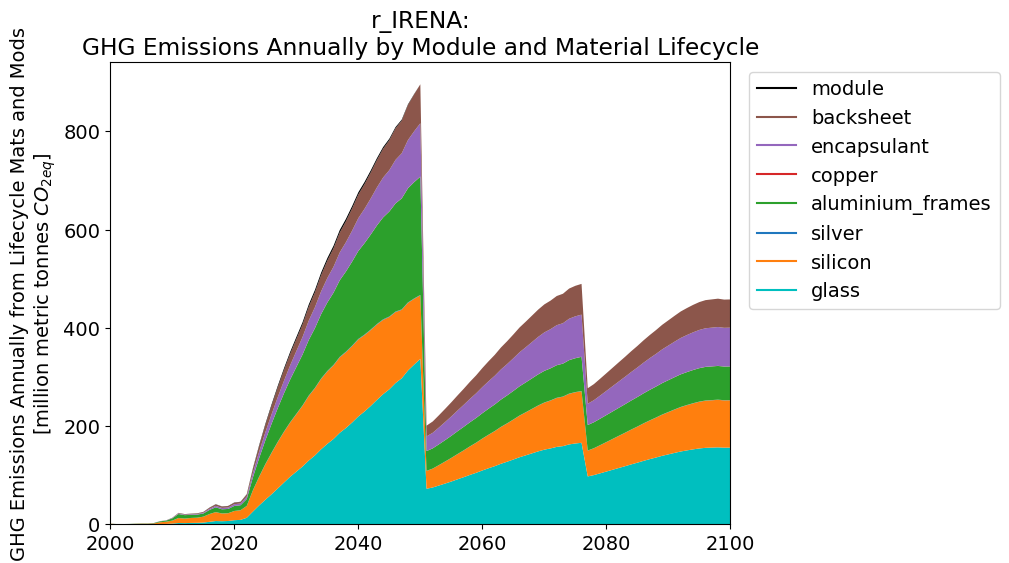

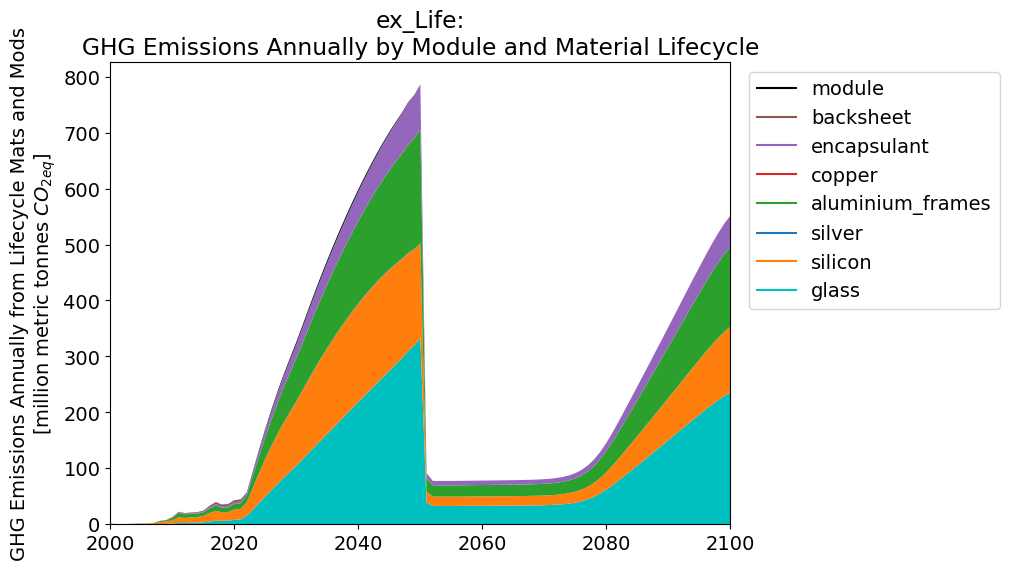

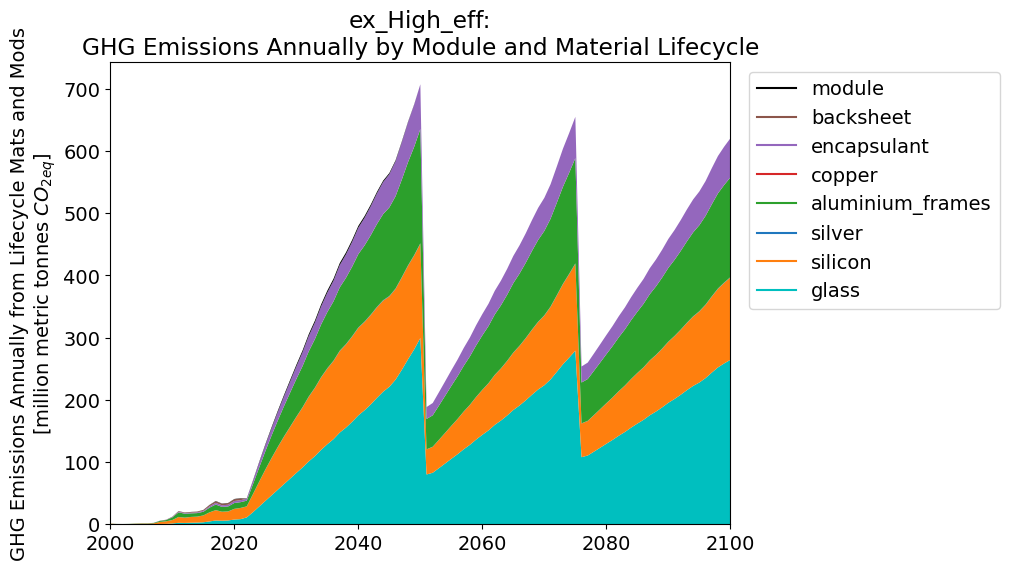

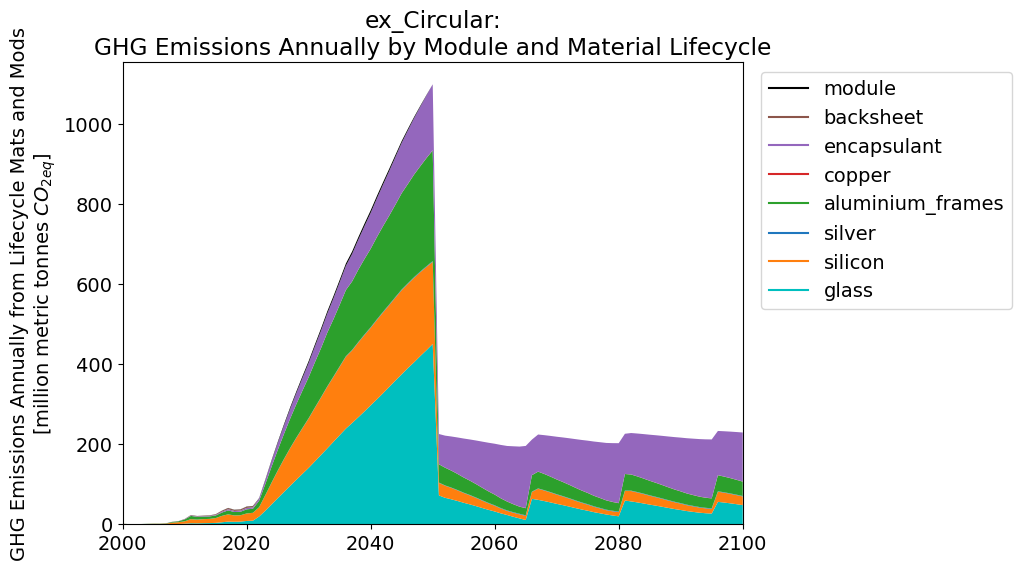

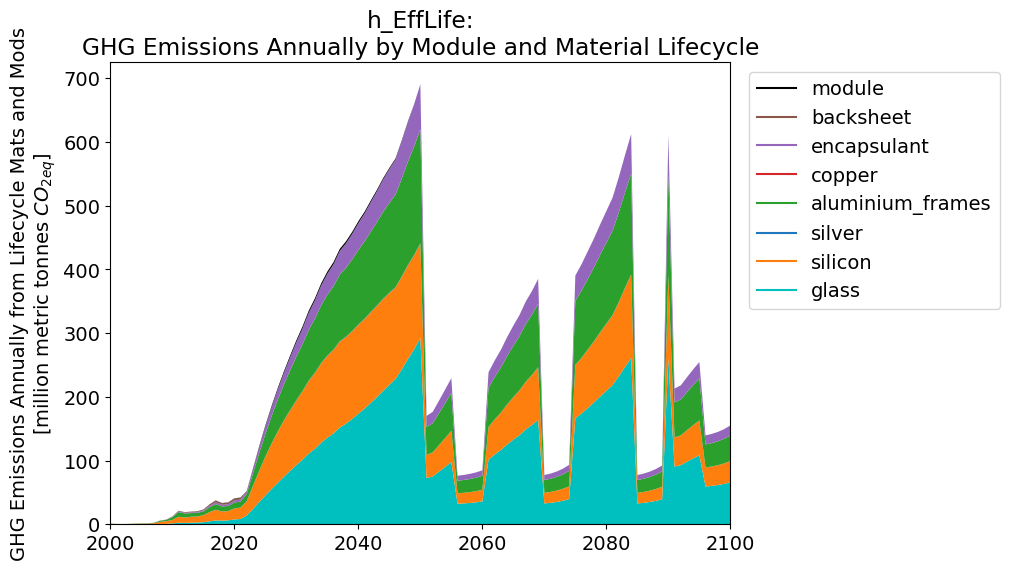

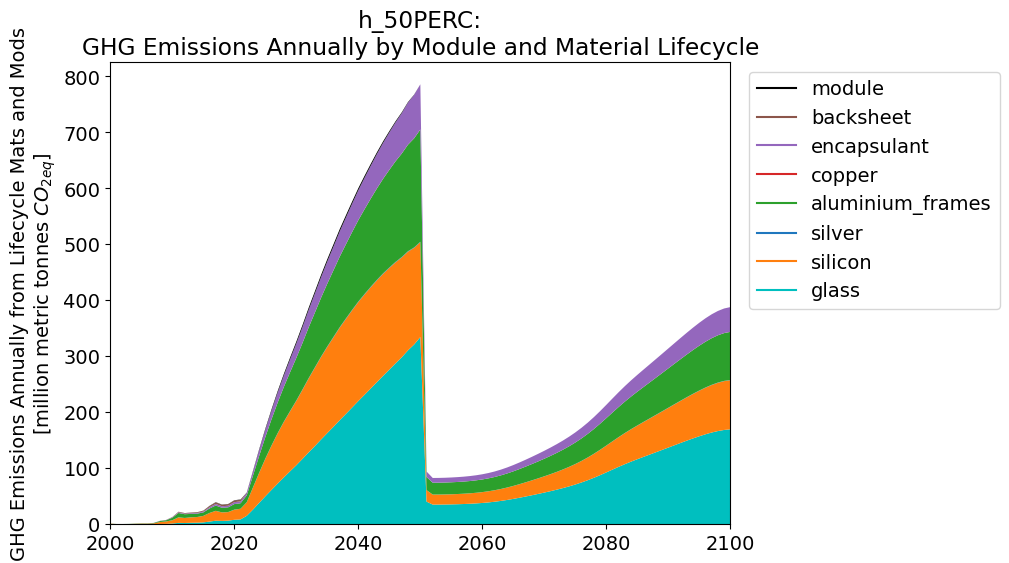

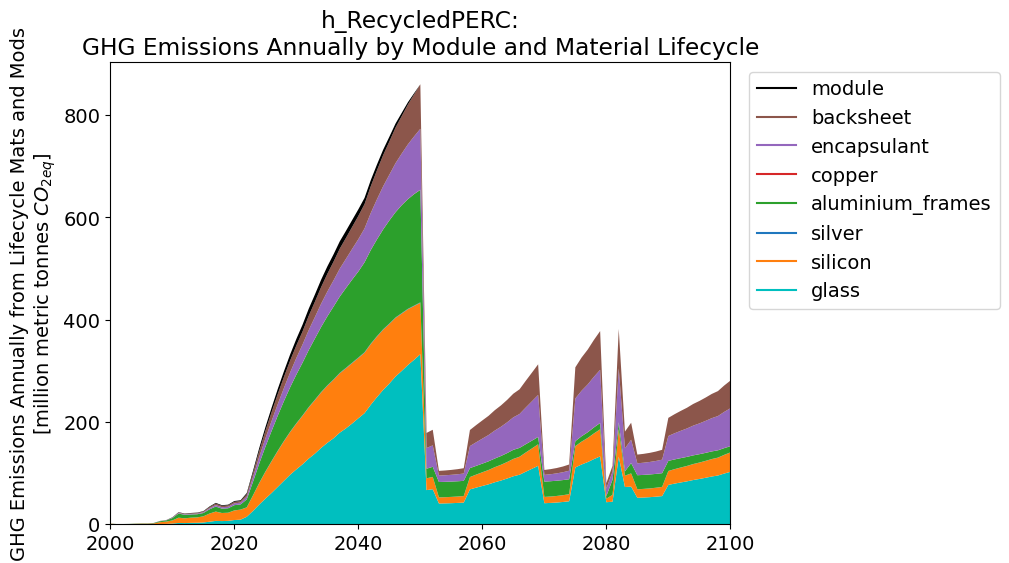

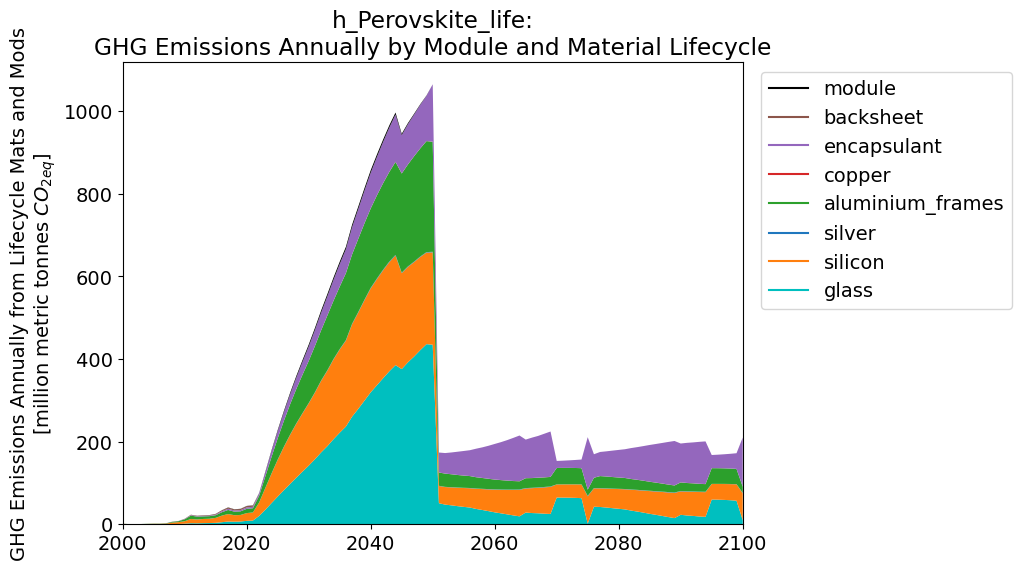

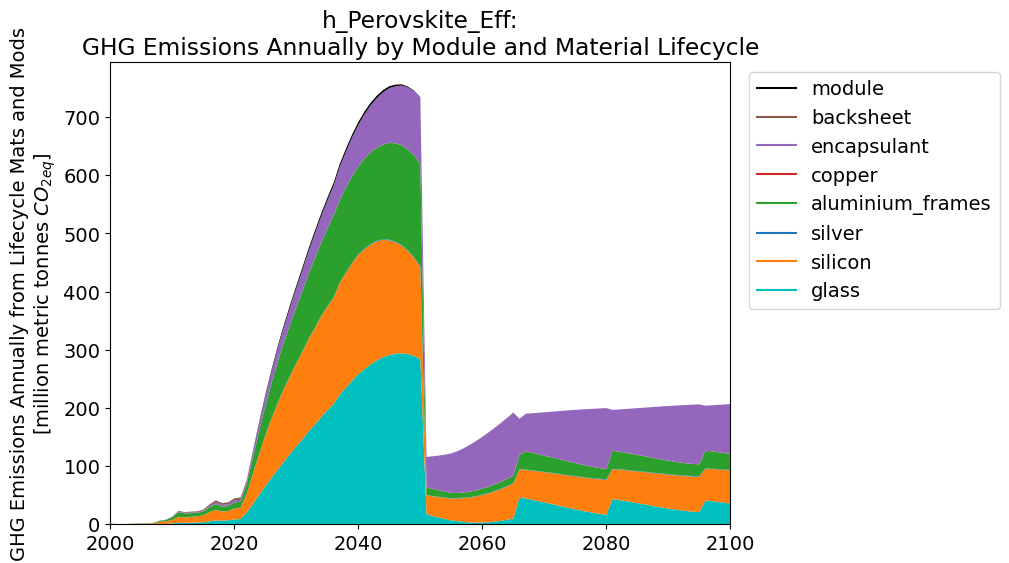

In [38]:
for scen in scenarios:

    scen_annual_carbon = sim_annual_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_annual_carbon.index,
                  scen_annual_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_mod_elec_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.45,1))

#plt.legend()
    plt.show()

In [39]:
maxy

35000.0

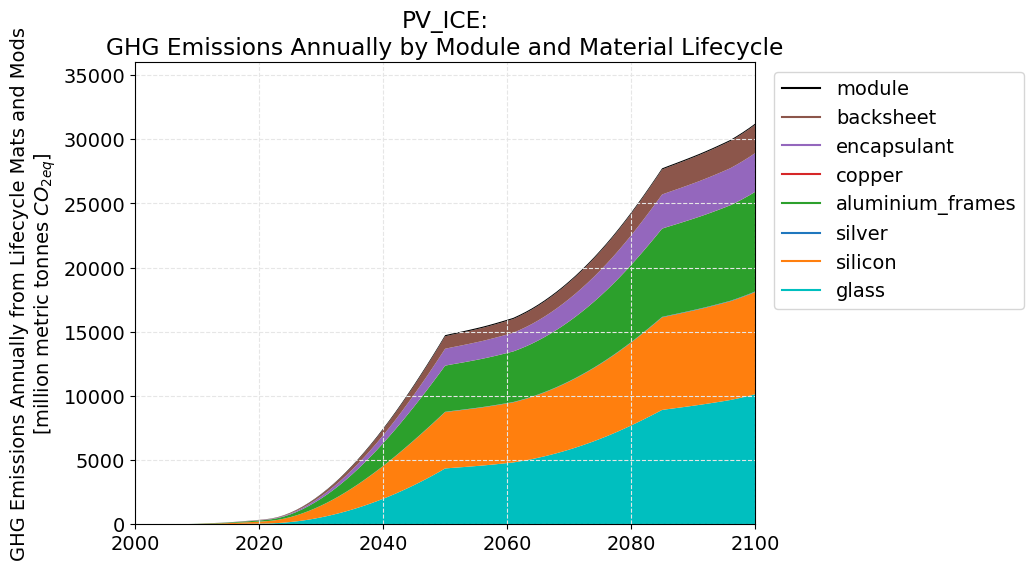

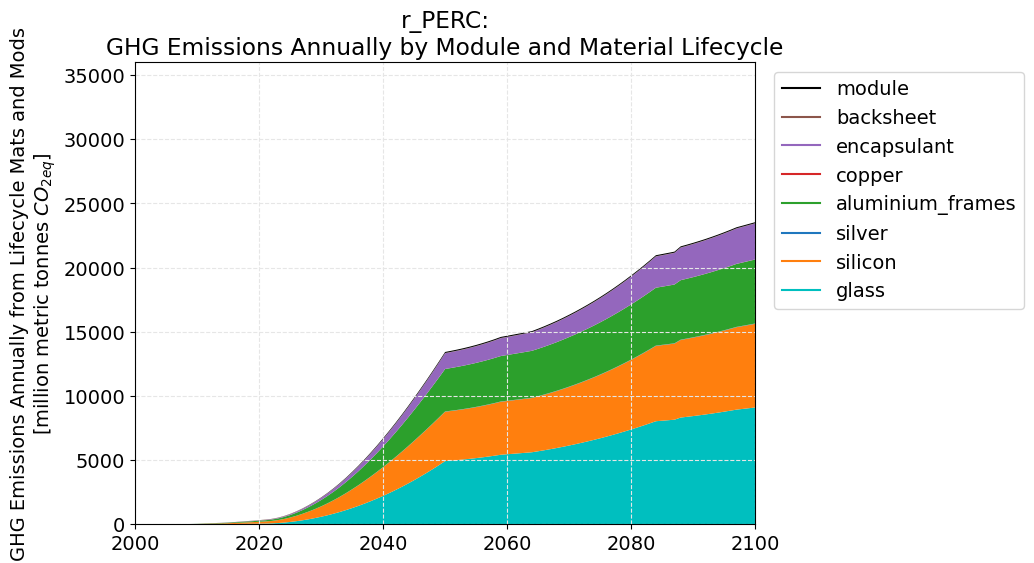

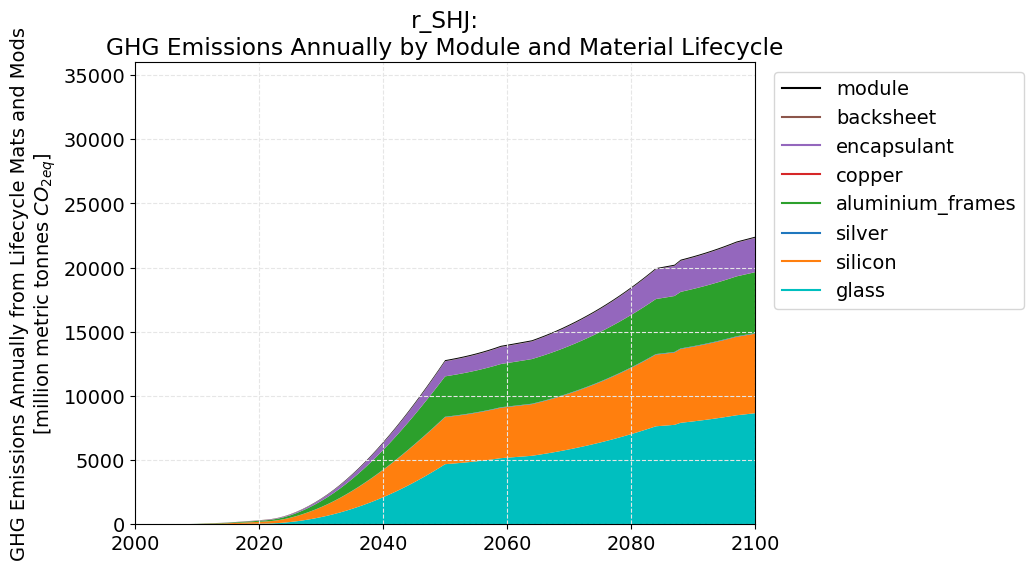

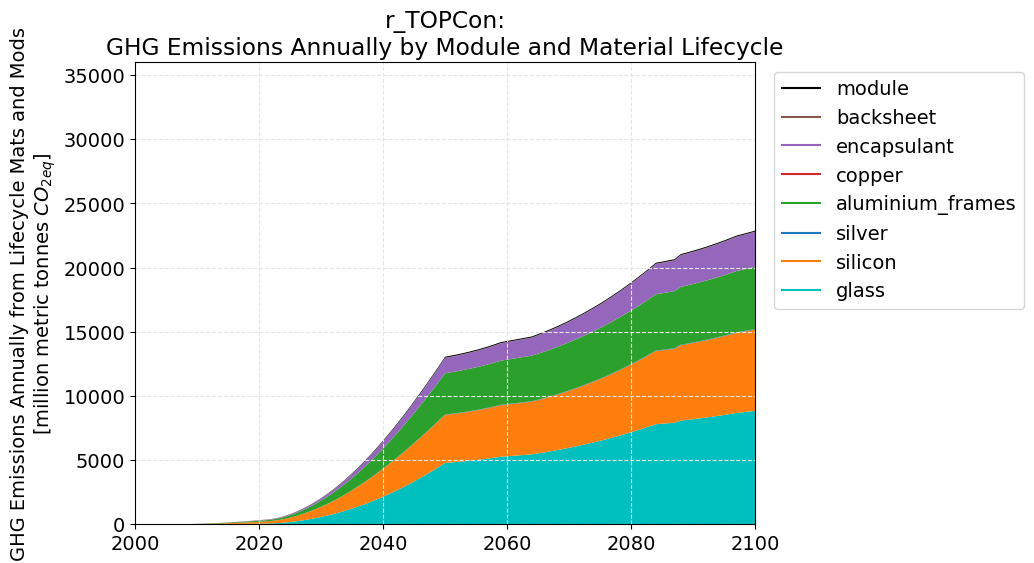

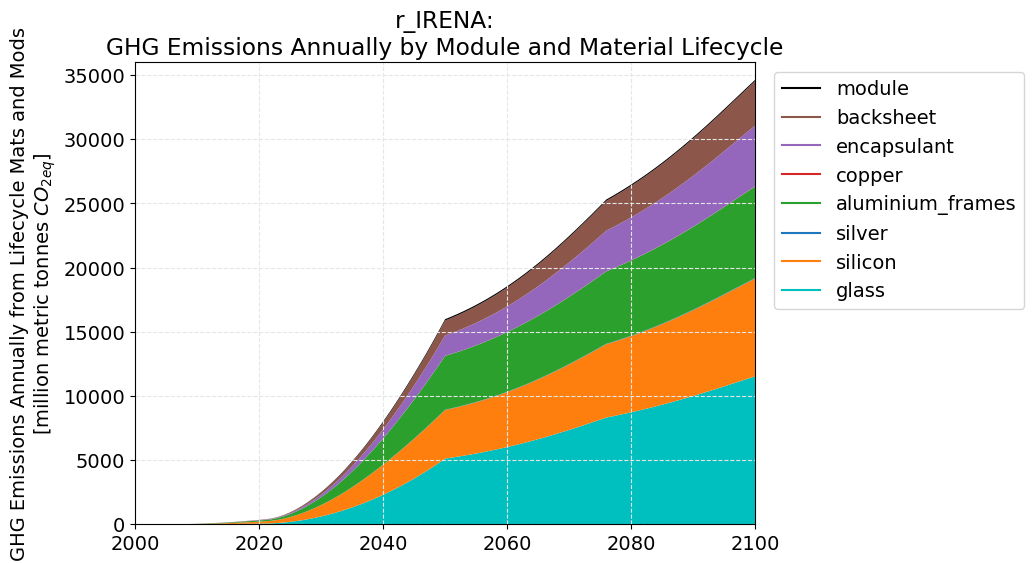

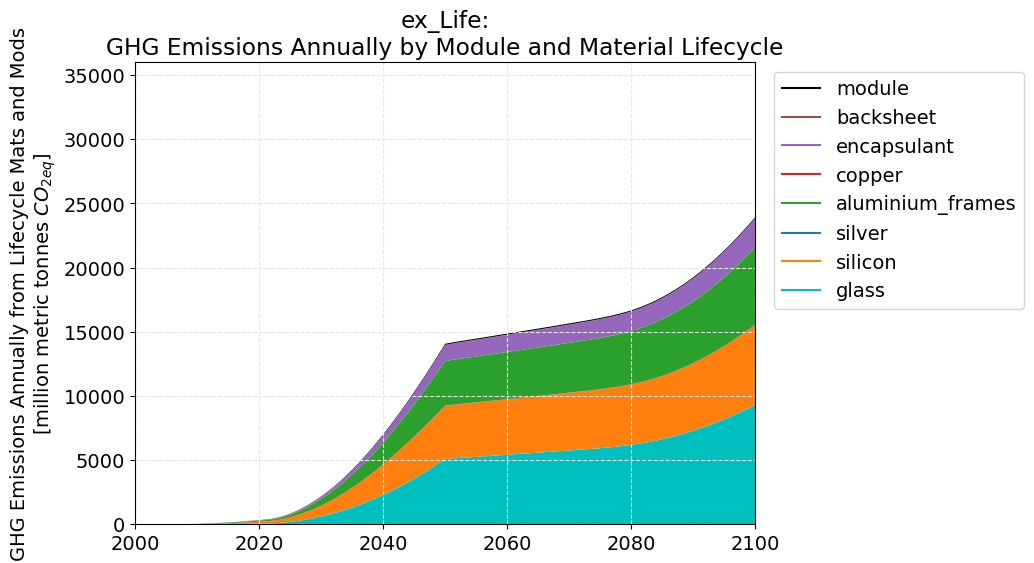

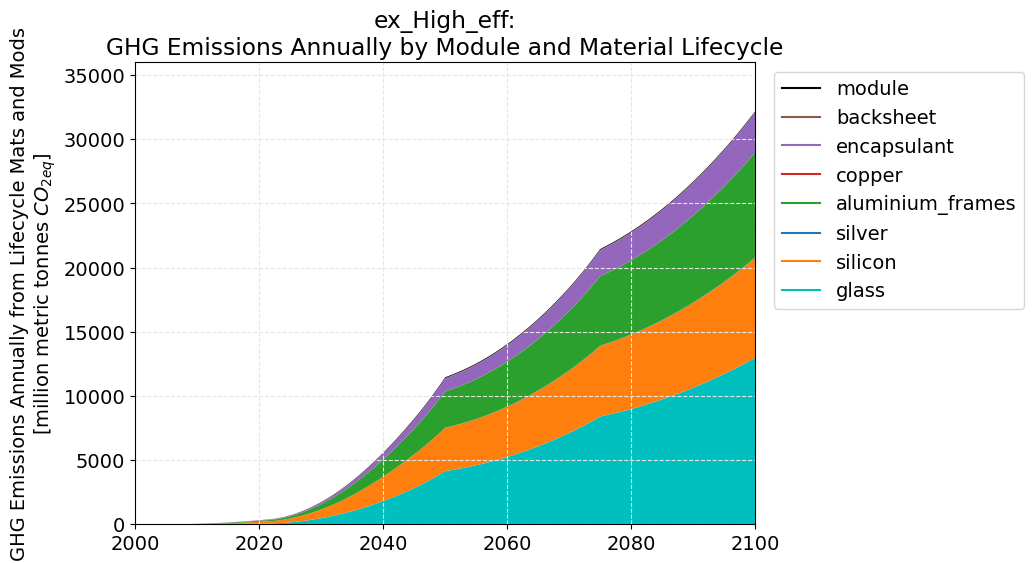

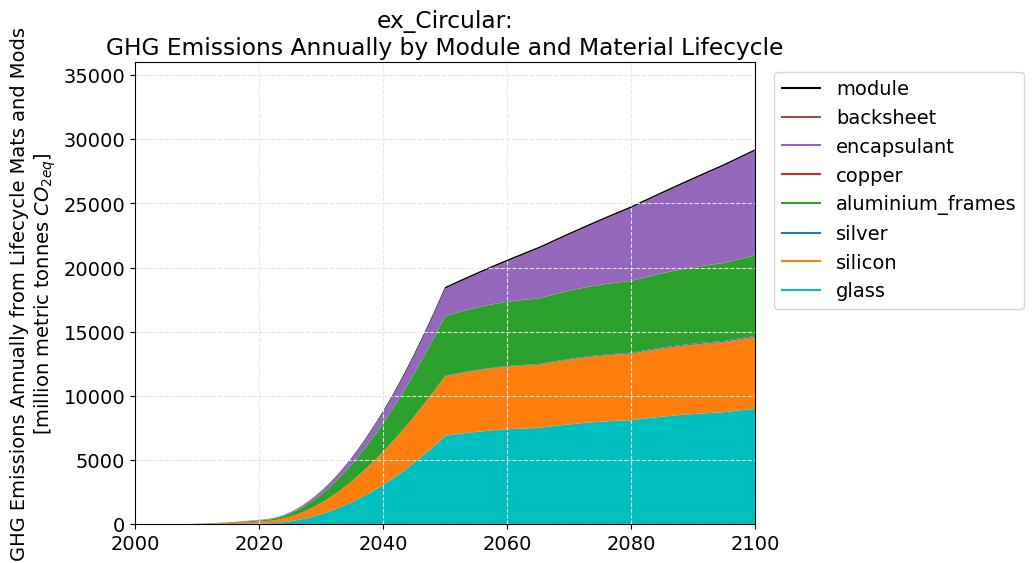

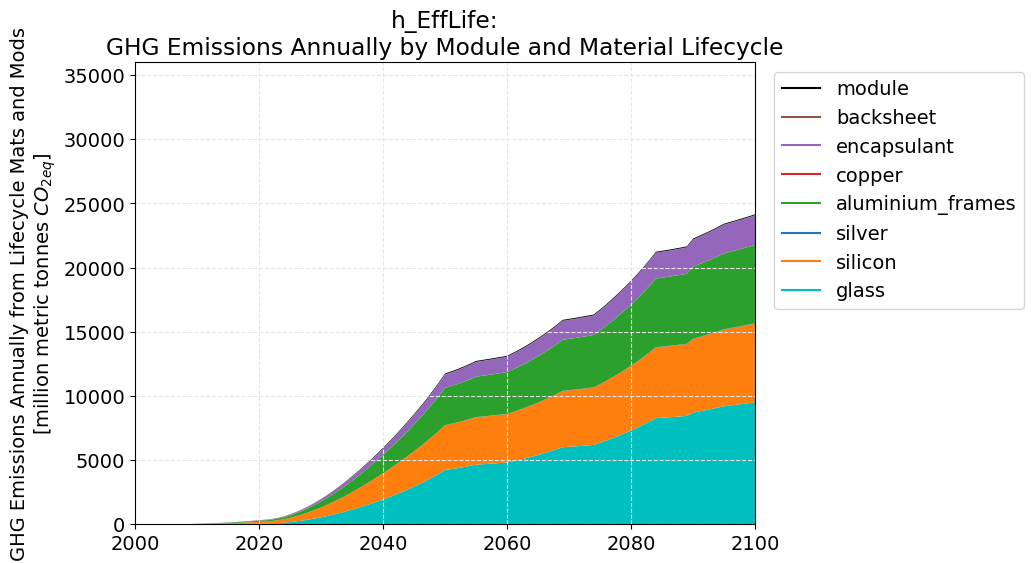

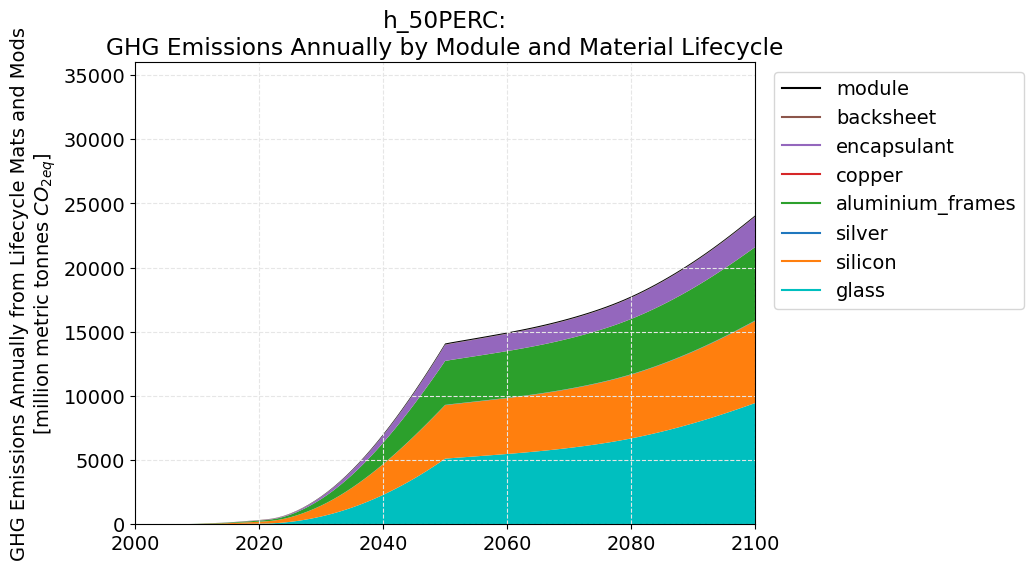

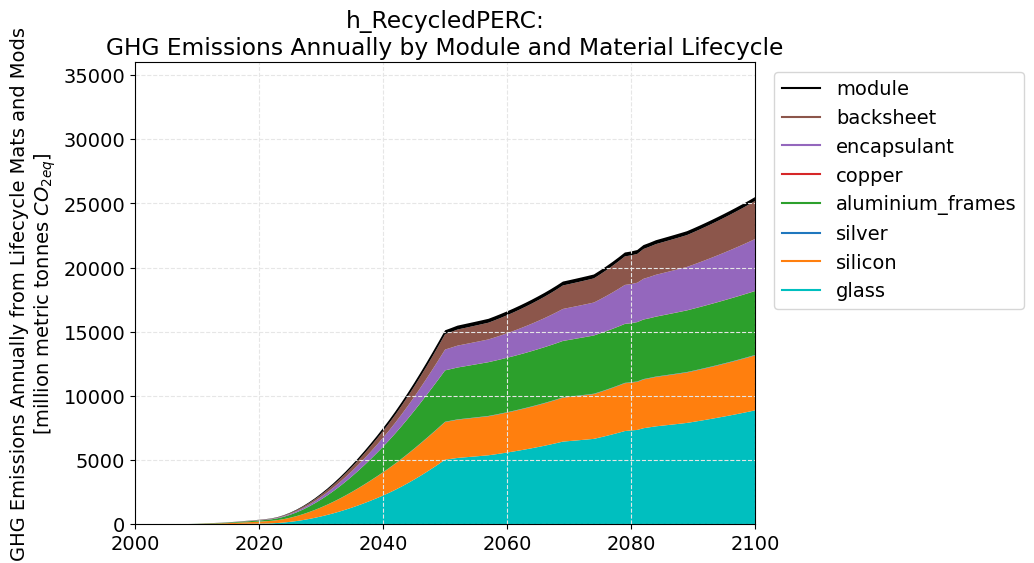

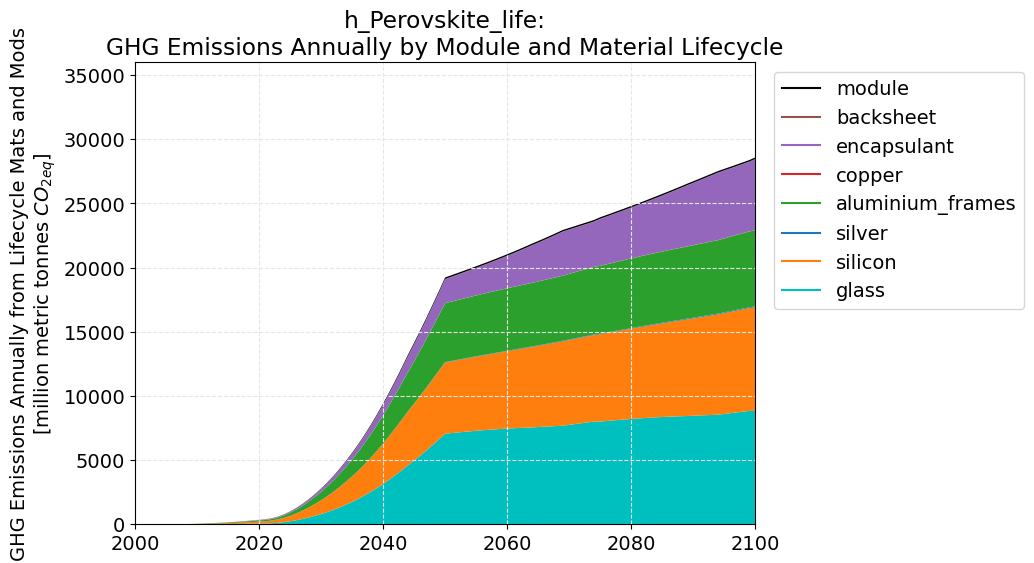

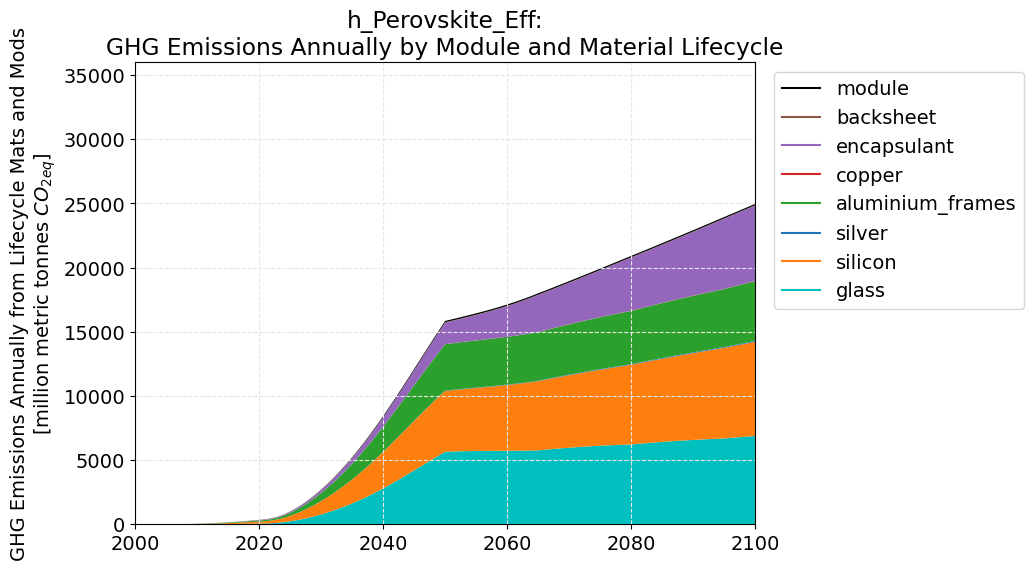

In [40]:
#colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B','black'] #colors for material plots
for scen in scenarios:

    scen_cumu_carbon = sim_cumu_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_cumu_carbon.index,
                  scen_cumu_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_mod_elec_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,maxy+1000)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.45,1))
    plt.grid(axis='both', which='both', color='0.9', ls='--')
#plt.legend()
    plt.show()

In [41]:
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_mod_elec')

PV_ICE_Annual_Emit_mod_elec_gCO2eq               8.661511e+13
r_PERC_Annual_Emit_mod_elec_gCO2eq               7.955485e+13
r_SHJ_Annual_Emit_mod_elec_gCO2eq                7.575890e+13
r_TOPCon_Annual_Emit_mod_elec_gCO2eq             7.733545e+13
r_IRENA_Annual_Emit_mod_elec_gCO2eq              1.014963e+14
ex_Life_Annual_Emit_mod_elec_gCO2eq              8.112453e+13
ex_High_eff_Annual_Emit_mod_elec_gCO2eq          6.481039e+13
ex_Circular_Annual_Emit_mod_elec_gCO2eq          1.238429e+14
h_EffLife_Annual_Emit_mod_elec_gCO2eq            6.864642e+13
h_50PERC_Annual_Emit_mod_elec_gCO2eq             8.163300e+13
h_RecycledPERC_Annual_Emit_mod_elec_gCO2eq       3.024845e+14
h_Perovskite_life_Annual_Emit_mod_elec_gCO2eq    1.173374e+14
h_Perovskite_Eff_Annual_Emit_mod_elec_gCO2eq     1.055897e+14
Name: 2100, dtype: float64

In [42]:
#create a df from which to do a bar chart of 2100 emissions by mat/mod
mats_emit_2100 = pd.DataFrame() #index=scennames_labels_flat
for mat in MATERIALS:
    mat_emit_2100 = pd.Series(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_'+mat).values)
    mats_emit_2100 = pd.concat([mats_emit_2100, mat_emit_2100], axis=1)

mats_emit_2100
mats_emit_2100.columns = MATERIALS
modmats_emit_2100 = pd.concat([mats_emit_2100,pd.Series(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_mod_elec').values)], axis=1)
modmats_emit_2100.index = scennames_labels_flat
modmats_emit_2100.rename(columns={0:'module'}, inplace=True)
modmats_emit_2100_megatonne = modmats_emit_2100/1e12
modmats_emit_2100_megatonne

glass      silicon     silver  \
PV_ICE                   10128.661994  7968.993348  39.555545   
PERC                      9100.755660  6517.214501  25.191311   
SHJ                       8652.812210  6200.580273  44.794737   
TOPCon                    8837.278528  6331.358047  43.333633   
Low Quality              11526.374030  7622.598168  40.635431   
Long-Lived                9270.300576  6248.034265  29.471217   
High Eff                 12963.265329  7780.725513  38.732726   
Circular                  8996.350286  5588.214634  92.251404   
High Eff + Long-life      9507.952013  6126.701851  31.290604   
Long-Life + Recycling     9444.863234  6398.350817  32.719877   
Recycled-Si + Long-life   8876.675002  4284.510232  33.593199   
Circular + Long-life      8839.142638  8073.453298  66.818549   
Circular + High Eff       6880.106946  7337.659905  68.893415   

                         aluminium_frames     copper  encapsulant  \
PV_ICE                        7759.907146   8.553999  3013.443849   
PERC                          4986.668409   7.933845  2800.113453   
SHJ                           4742.685932   7.545504  2662.628153   
TOPCon                        4843.242140   7.705695  2719.277076   
Low Quality                   7133.665114  12.970040  4731.060652   
Long-Lived                    6013.562121   6.784228  2244.838020   
High Eff                      8176.784091   8.755677  3115.456836   
Circular                      6254.983351  21.597082  8123.698405   
High Eff + Long-life          6098.983567   6.741955  2295.131175   
Long-Life + Recycling         5717.789805   6.882528  2360.827092   
Recycled-Si + Long-life       4978.766570  11.277104  4044.829561   
Circular + Long-life          5916.944139  15.130176  5526.821345   
Circular + High Eff           4657.933648  15.835931  5875.785931   

                           backsheet      module  
PV_ICE                   2211.805161   86.615111  
PERC                       21.729228   79.554845  
SHJ                        21.330504   75.758903  
TOPCon                     21.528020   77.335447  
Low Quality              3466.044108  101.496270  
Long-Lived                 22.463092   81.124534  
High Eff                   21.291503   64.810392  
Circular                   23.250434  123.842906  
High Eff + Long-life       21.291435   68.646424  
Long-Life + Recycling      22.463337   81.633002  
Recycled-Si + Long-life  2965.494878  302.484496  
Circular + Long-life       23.250434  117.337425  
Circular + High Eff        23.250434  105.589706

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\3630820325.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\3630820325.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\3630820325.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)


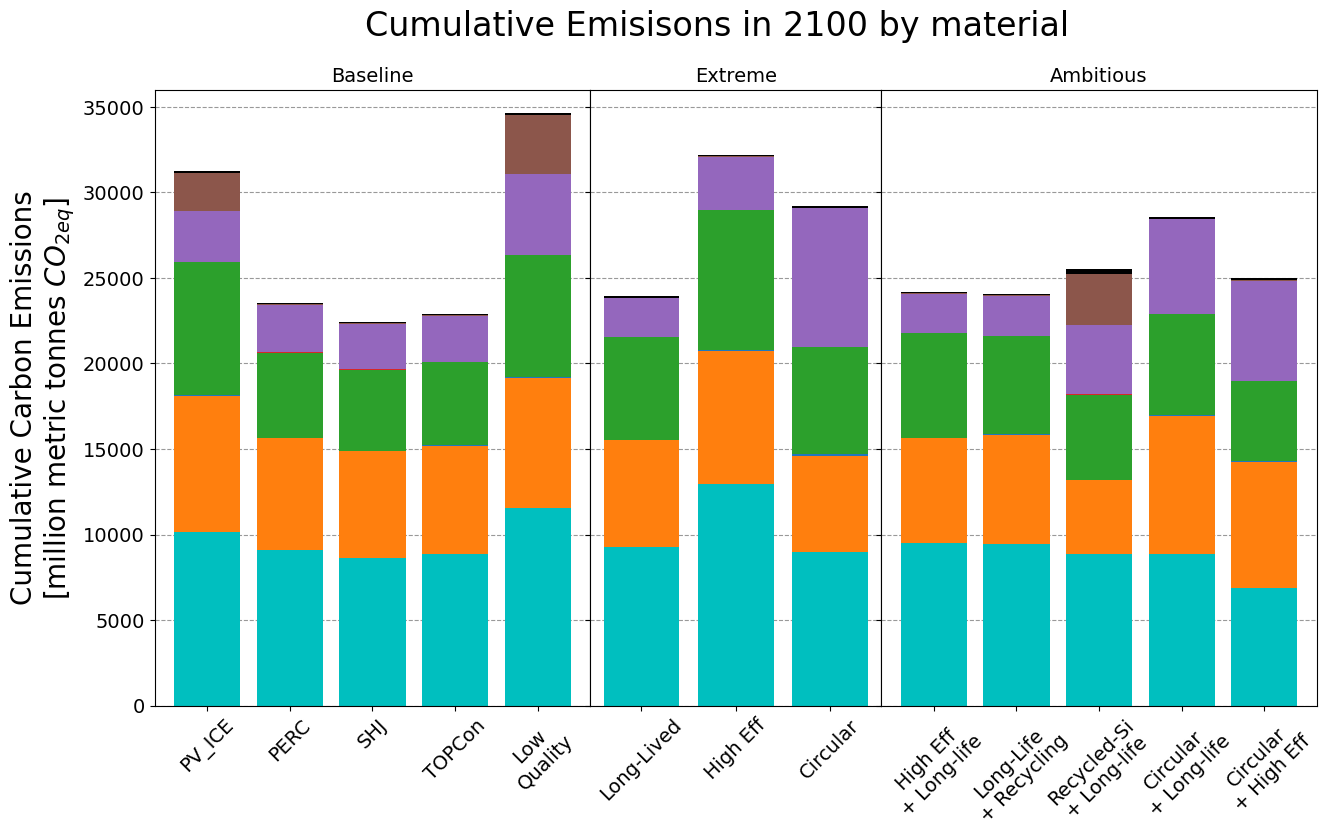

In [43]:
fig_cumuemit_modmat, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[0])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silicon'],
        bottom=modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[1])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:2].sum(axis=1), color=colormats[2])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:3].sum(axis=1), color=colormats[3])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:4].sum(axis=1), color=colormats[4])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:5].sum(axis=1), color=colormats[5])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:6].sum(axis=1), color=colormats[6])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:7].sum(axis=1), color='black')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[0])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silicon'],
        bottom=modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[1])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:2].sum(axis=1), color=colormats[2])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:3].sum(axis=1), color=colormats[3])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:4].sum(axis=1), color=colormats[4])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:5].sum(axis=1), color=colormats[5])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:6].sum(axis=1), color=colormats[6])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:7].sum(axis=1), color='black')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['glass'], color=colormats[0])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silicon'],
        bottom=modmats_emit_2100_megatonne[8:]['glass'], color=colormats[1])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:2].sum(axis=1), color=colormats[2])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:3].sum(axis=1), color=colormats[3])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:4].sum(axis=1), color=colormats[4])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:5].sum(axis=1), color=colormats[5])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:6].sum(axis=1), color=colormats[6])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:7].sum(axis=1), color='black')


ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumuemit_modmat.suptitle('Cumulative Emisisons in 2100 by material', fontsize=24)
plt.show()

#fig_cumuemit_modmat.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

In [44]:
cumu_emit_sum = modmats_emit_2100_megatonne.sum(axis=1)
fraction_modmats_cumu_emit = modmats_emit_2100_megatonne.div(cumu_emit_sum, axis=0)*100
fraction_modmats_cumu_emit

glass    silicon    silver  aluminium_frames  \
PV_ICE                   32.445424  25.527298  0.126709         24.857526   
PERC                     38.662192  27.686690  0.107019         21.184563   
SHJ                      38.614600  27.671111  0.199904         21.165017   
TOPCon                   38.622682  27.670739  0.189386         21.167037   
Low Quality              33.279706  22.008467  0.117325         20.596787   
Long-Lived               38.760982  26.124282  0.123225         25.143907   
High Eff                 40.296354  24.186411  0.120401         25.417561   
Circular                 30.783918  19.121881  0.315668         21.403446   
High Eff + Long-life     39.359419  25.362289  0.129532         25.247545   
Long-Life + Recycling    39.246438  26.587201  0.135962         23.759252   
Recycled-Si + Long-life  34.813724  16.803562  0.131750         19.526389   
Circular + Long-life     30.928913  28.249701  0.233804         20.703892   
Circular + High Eff      27.558949  29.391722  0.275959         18.657814   

                           copper  encapsulant  backsheet    module  
PV_ICE                   0.027401     9.653048   7.085137  0.277457  
PERC                     0.033705    11.895553   0.092311  0.337968  
SHJ                      0.033673    11.882417   0.095191  0.338087  
TOPCon                   0.033677    11.884402   0.094087  0.337989  
Low Quality              0.037448    13.659830  10.007391  0.293047  
Long-Lived               0.028366     9.386117   0.093923  0.339198  
High Eff                 0.027217     9.684408   0.066185  0.201463  
Circular                 0.073901    27.797858   0.079559  0.423769  
High Eff + Long-life     0.027909     9.500998   0.088139  0.284171  
Long-Life + Recycling    0.028599     9.809994   0.093342  0.339211  
Recycled-Si + Long-life  0.044228    15.863550  11.630472  1.186324  
Circular + Long-life     0.052942    19.338819   0.081355  0.410574  
Circular + High Eff      0.063432    23.536042   0.093132  0.422950

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\2389923115.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\2389923115.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\2389923115.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)


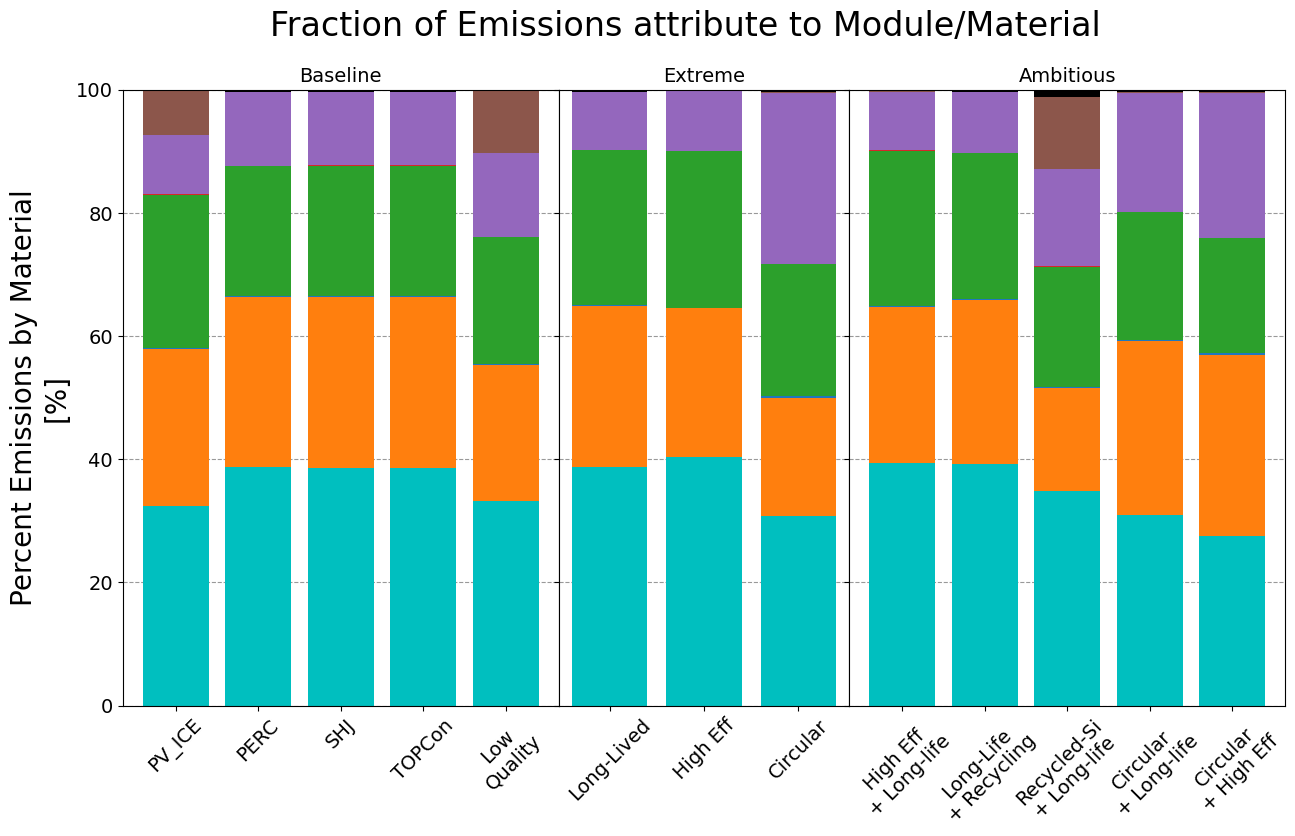

In [45]:
fig_cumuemit_modmat, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['glass'], color=colormats[0])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['silicon'],
        bottom=fraction_modmats_cumu_emit[0:5]['glass'], color=colormats[1])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:2].sum(axis=1), color=colormats[2])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:3].sum(axis=1), color=colormats[3])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:4].sum(axis=1), color=colormats[4])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:5].sum(axis=1), color=colormats[5])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:6].sum(axis=1), color=colormats[6])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:7].sum(axis=1), color='black')

ax0.set_ylim(0,100)
ax0.set_ylabel('Percent Emissions by Material\n[%]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['glass'], color=colormats[0])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['silicon'],
        bottom=fraction_modmats_cumu_emit[5:8]['glass'], color=colormats[1])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:2].sum(axis=1), color=colormats[2])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:3].sum(axis=1), color=colormats[3])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:4].sum(axis=1), color=colormats[4])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:5].sum(axis=1), color=colormats[5])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:6].sum(axis=1), color=colormats[6])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:7].sum(axis=1), color='black')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['glass'], color=colormats[0])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['silicon'],
        bottom=fraction_modmats_cumu_emit[8:]['glass'], color=colormats[1])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:2].sum(axis=1), color=colormats[2])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:3].sum(axis=1), color=colormats[3])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:4].sum(axis=1), color=colormats[4])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:5].sum(axis=1), color=colormats[5])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:6].sum(axis=1), color=colormats[6])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:7].sum(axis=1), color='black')


ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumuemit_modmat.suptitle('Fraction of Emissions attribute to Module/Material', fontsize=24)
plt.show()

#fig_cumuemit_modmat.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# Cumulative Carbon in 2050 and 2100

In [46]:
#mins in 2050 and 2100
cumu_carbon_2050 = sim_cumu_carbon.loc[2050].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_2100 = sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_rankings_crittime = pd.concat([cumu_carbon_2050,cumu_carbon_2100], axis=1)
cumu_carbon_rankings_crittime.index = scennames_labels_flat
cumu_carbon_rankings_crittime_bmt = cumu_carbon_rankings_crittime/1000
round(cumu_carbon_rankings_crittime_bmt,1)

2050  2100
PV_ICE                   14.7  31.2
PERC                     13.4  23.5
SHJ                      12.8  22.4
TOPCon                   13.1  22.9
Low Quality              16.0  34.6
Long-Lived               14.1  23.9
High Eff                 11.5  32.2
Circular                 18.5  29.2
High Eff + Long-life     11.7  24.2
Long-Life + Recycling    14.1  24.1
Recycled-Si + Long-life  15.1  25.5
Circular + Long-life     19.2  28.6
Circular + High Eff      15.8  25.0

In [47]:
cumu_carbon_rankings_crittime_plot = cumu_carbon_rankings_crittime.copy()
cumu_carbon_rankings_crittime_plot['diff'] = cumu_carbon_rankings_crittime[2100]-cumu_carbon_rankings_crittime[2050]

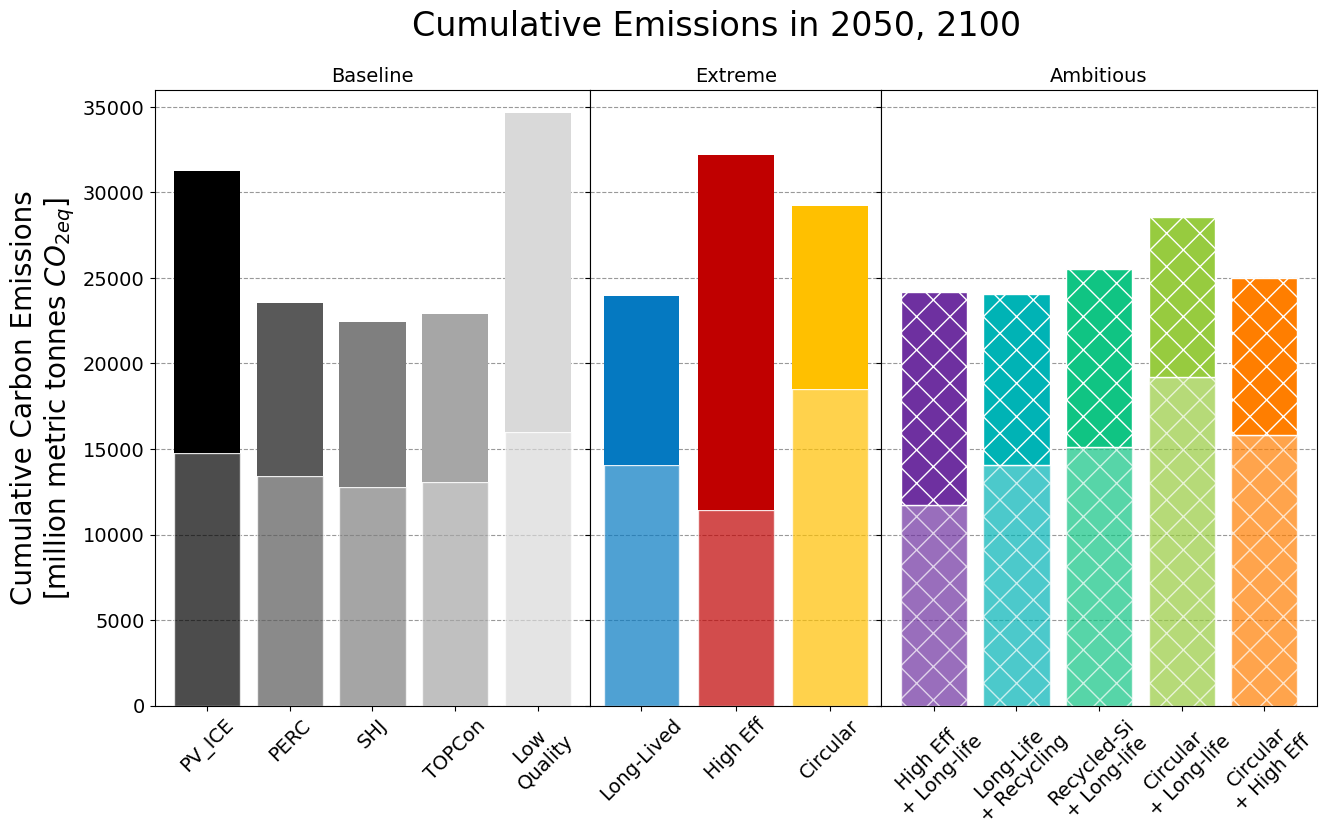

In [48]:

fig_cumulativeemit, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5], alpha = 0.7, edgecolor='white')
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot['diff'].iloc[0:5],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5])
ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8], alpha = 0.7, edgecolor='white')
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot['diff'].iloc[5:8],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8])
ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white', alpha=0.7)
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot['diff'].iloc[8:],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white')
ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumulativeemit.suptitle('Cumulative Emissions in 2050, 2100', fontsize=24)
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# 

# Emissions by electricity vs fuels vs process
## Process emission summing
 This only happens on the material files

In [49]:
process_emissions = pd.DataFrame()
for scen in scenarios:
    scen_p = sim_carbon_dfs.filter(like=scen).filter(like='_p_')
    scen_p_sum = scen_p.sum(axis=1)
    process_emissions = pd.concat([process_emissions,scen_p_sum], axis=1)

process_emissions.columns = scennames_labels_flat
process_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
process_emissions_cumu = process_emissions.cumsum()

In [50]:
#process_emissions_cumu

## Fuel Emissions
This is capturing steam and heating fuel, also only on material level

In [51]:
fuel_emissions = pd.DataFrame()
for scen in scenarios:
    scen_f = sim_carbon_dfs.filter(like=scen).filter(like='_fuel_')
    scen_f_sum = scen_f.sum(axis=1)
    fuel_emissions = pd.concat([fuel_emissions,scen_f_sum], axis=1)
    
fuel_emissions.columns = scennames_labels_flat
fuel_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
fuel_emissions_cumu = fuel_emissions.cumsum()

In [52]:
#fuel_emissions_cumu

## Electricity Emissions
both module and material level elec.

In [53]:
elec_emissions = pd.DataFrame()
for scen in scenarios:
    scen_mod_elec = sim_carbon_dfs.filter(like=scen).filter(like='Global_mod_MFG') #module elec lifecycle emits
    
    #material elec emits
    mat_eleckey = ['Global_vmfg_elec','landfill_elec','ReMFG_clean_elec','Recycled_LQ_elec','Recycled_HQ_elec']
    mat_elecs_search = '|'.join(mat_eleckey)
    scen_mat_elecs = sim_carbon_dfs.loc[:,sim_carbon_dfs.columns.str.contains(mat_elecs_search)].filter(like=scen)
    scen_mat_elecs_sum = scen_mat_elecs.sum(axis=1)
    
    #sum them together by scen
    scen_elec_modmat_annual_sum = scen_mat_elecs_sum+scen_mod_elec.iloc[:,0]
    elec_emissions = pd.concat([elec_emissions,scen_elec_modmat_annual_sum], axis=1)
    
elec_emissions.columns=scennames_labels_flat
elec_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
elec_emissions_cumu = elec_emissions.cumsum()

In [54]:
#graphing by emission source
efp_emit_total = elec_emissions+fuel_emissions+process_emissions
efp_emit_total_cumu = elec_emissions_cumu+fuel_emissions_cumu+process_emissions_cumu

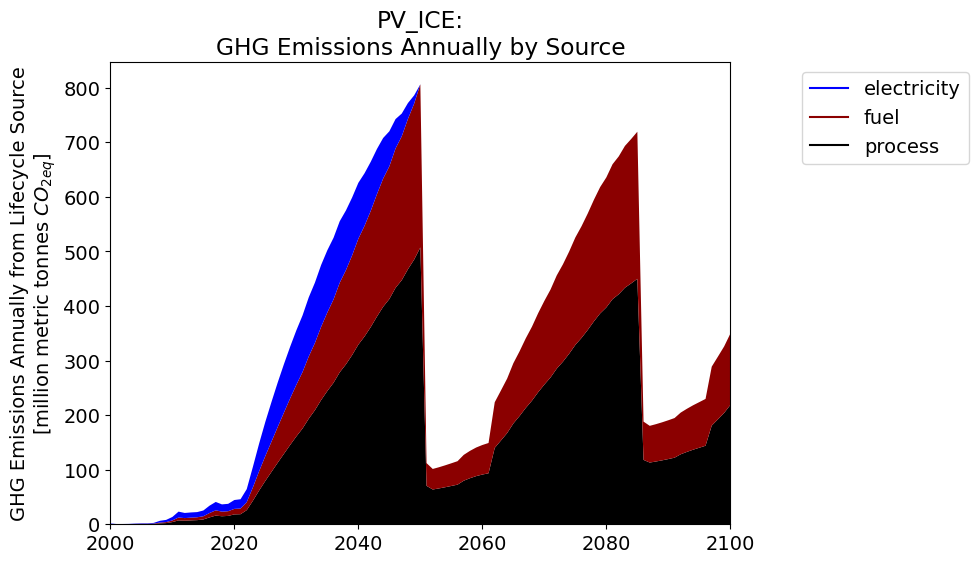

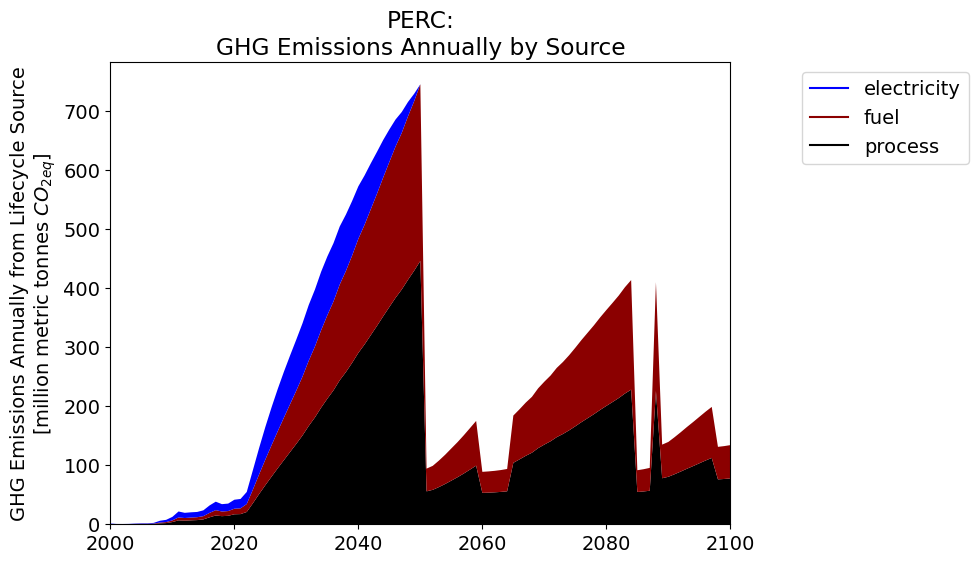

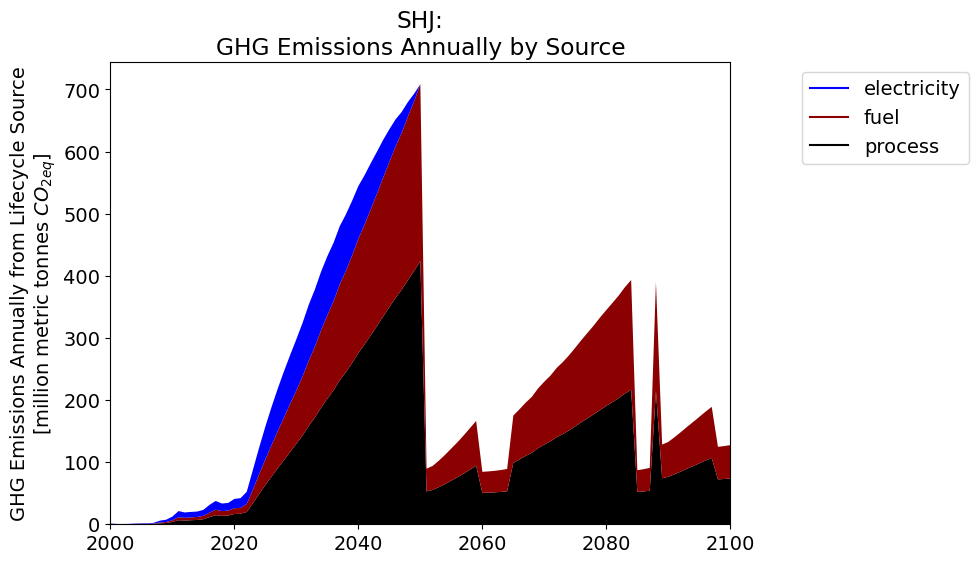

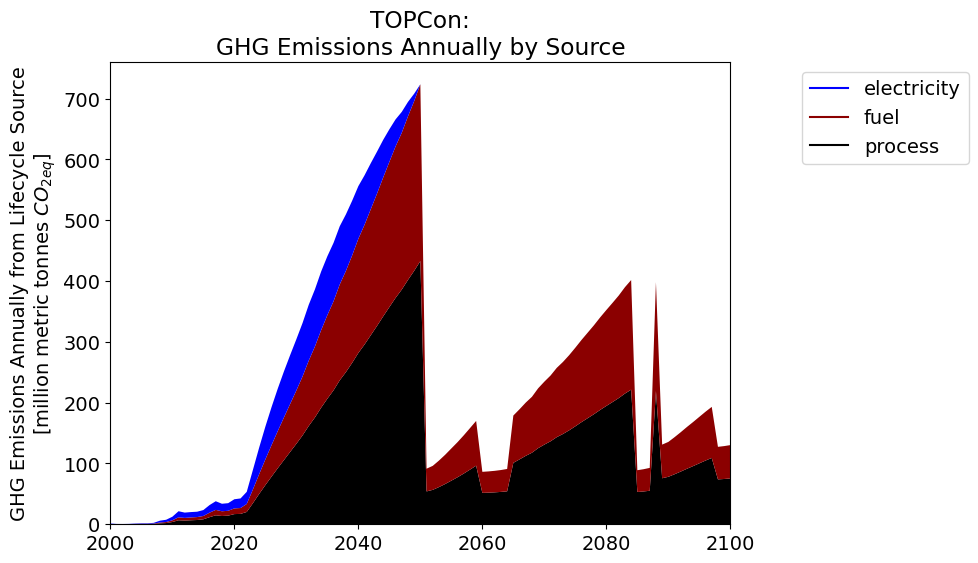

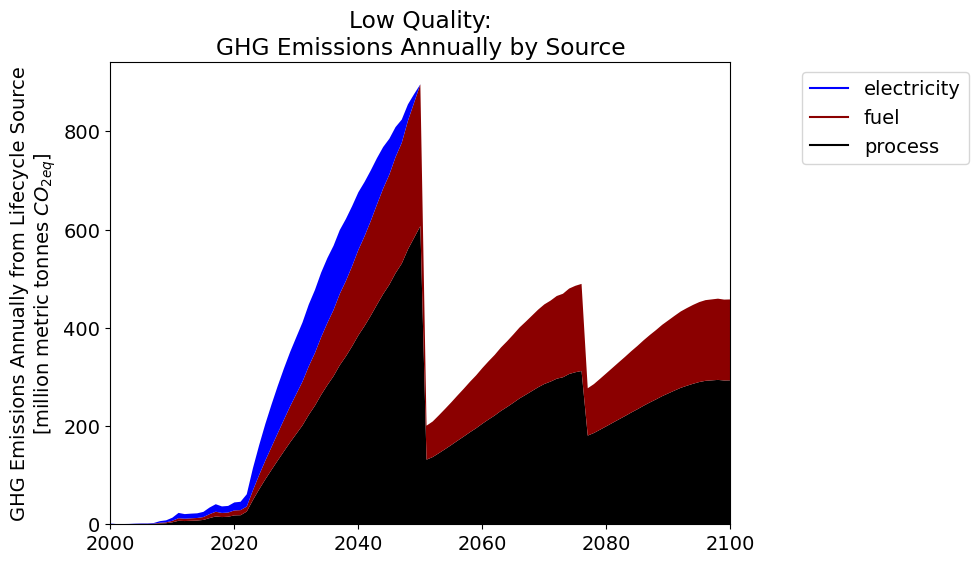

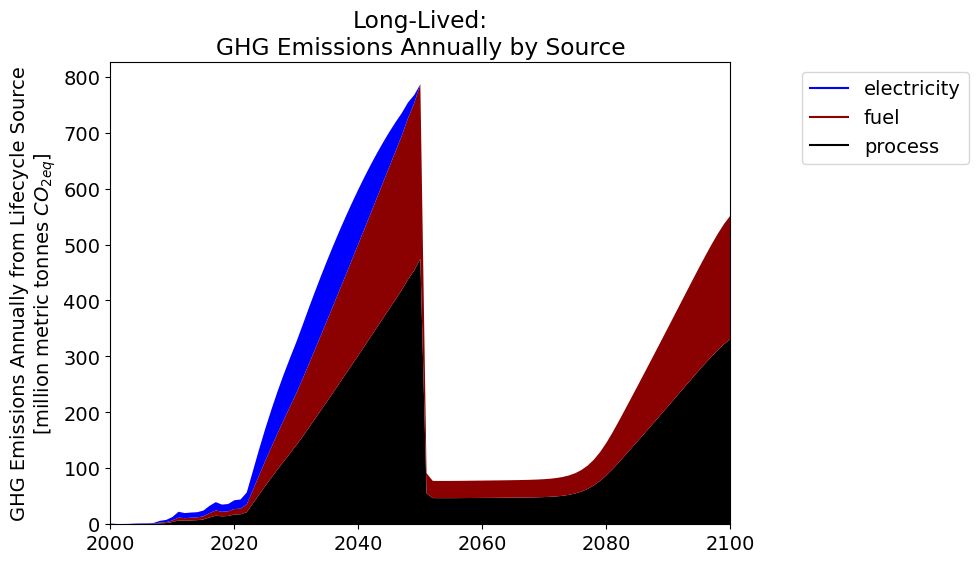

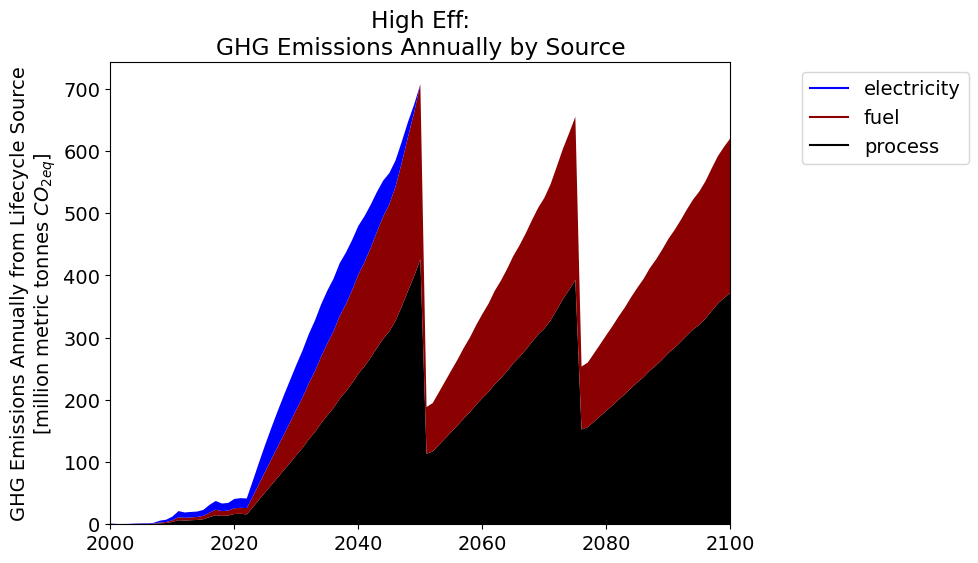

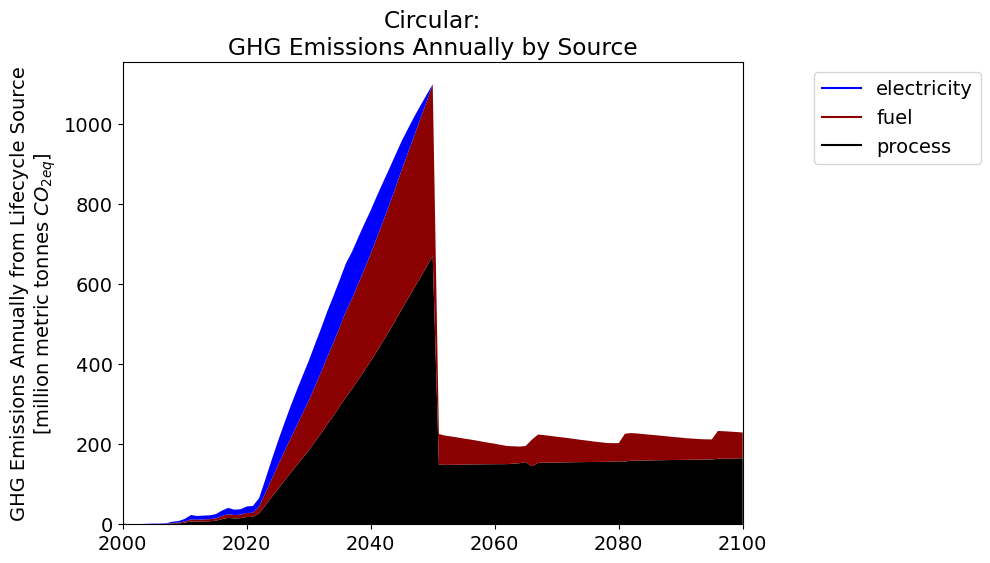

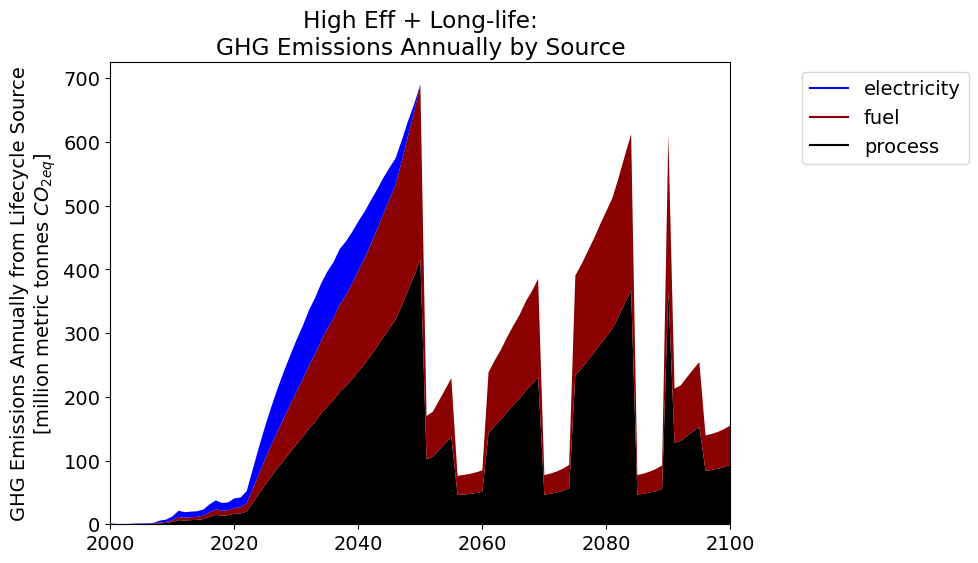

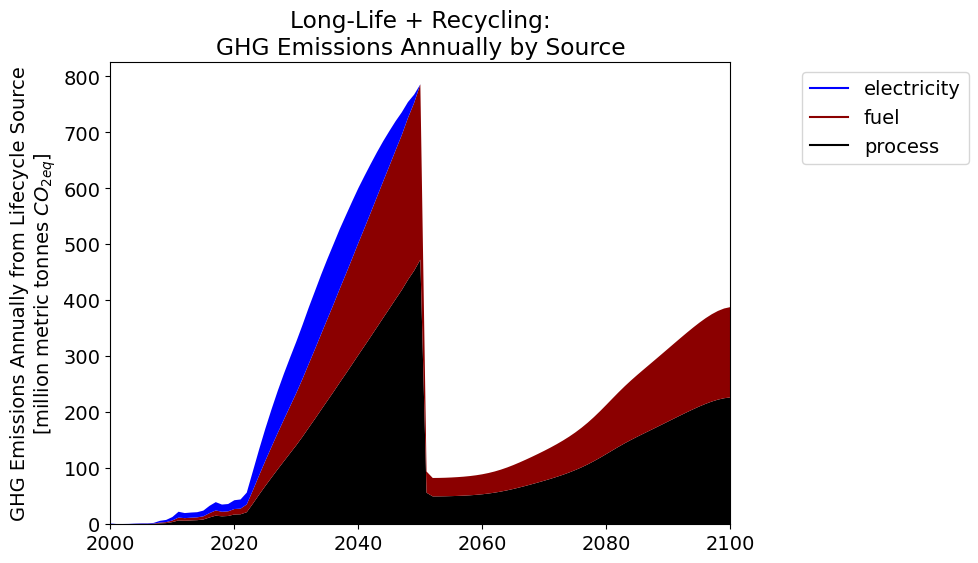

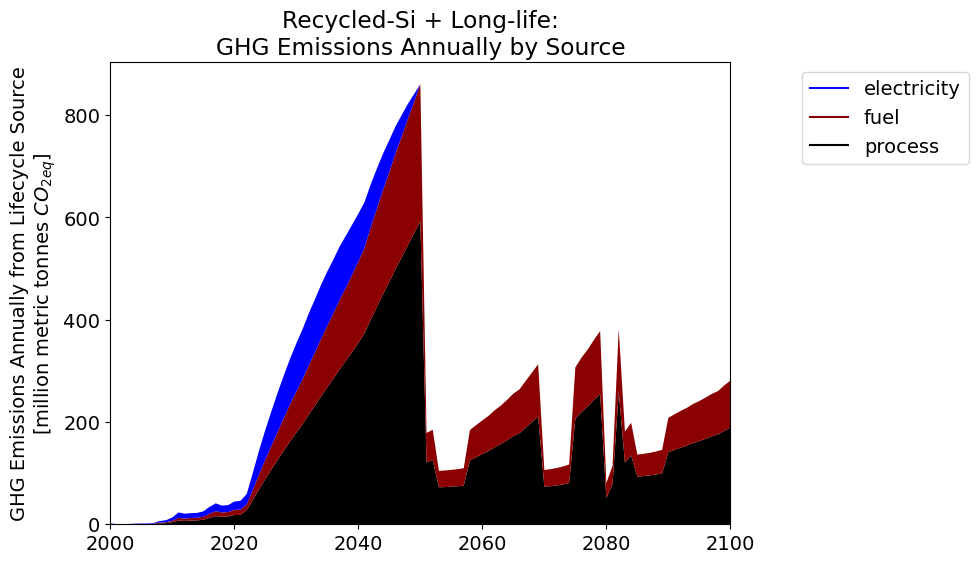

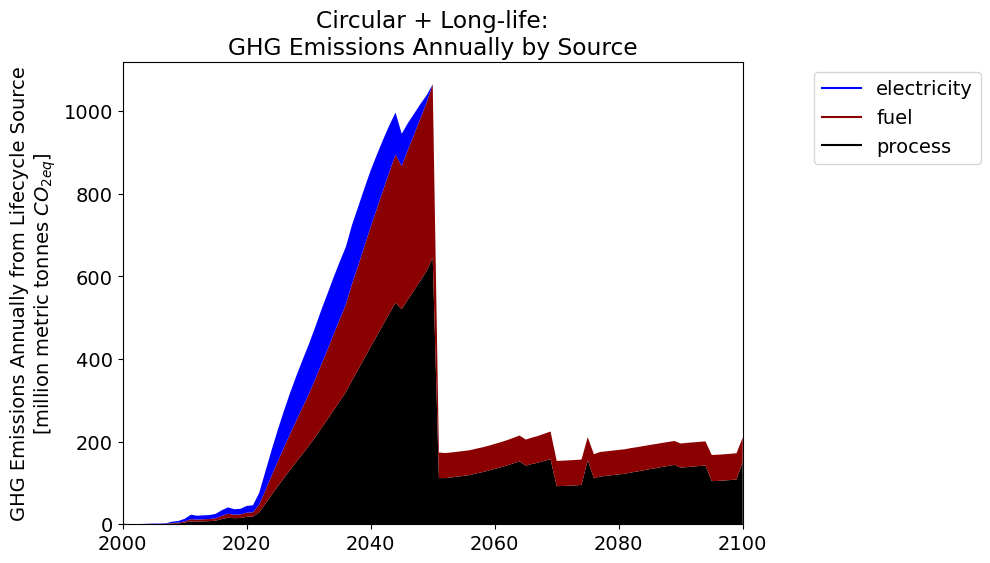

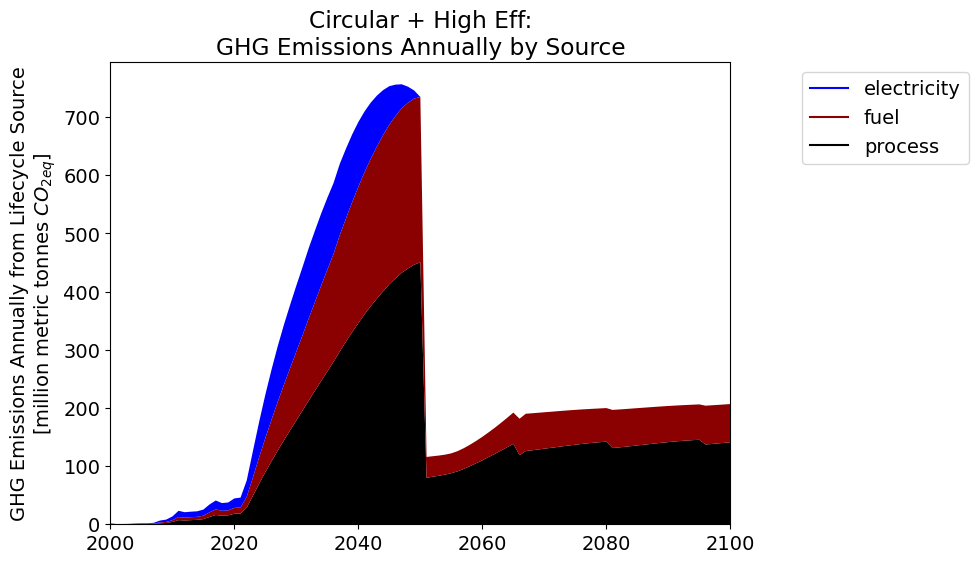

In [55]:
#graphing by emission source, annual
#efp_emit_total = elec_emissions+fuel_emissions+process_emissions

for scen in scennames_labels_flat:
    
    plt.plot([],[],color='black', label='process')
    plt.plot([],[],color='darkred', label='fuel')
    plt.plot([],[],color='blue', label='electricity')

    plt.stackplot(elec_emissions.index,
                  process_emissions[scen]/1e12, 
                  fuel_emissions[scen]/1e12,
                  elec_emissions[scen]/1e12, 
                  colors = ['black','darkred','blue'])
    plt.title(scen+':\nGHG Emissions Annually by Source')
    plt.ylabel('GHG Emissions Annually from Lifecycle Source\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))
    #plt.grid(axis='both', which='both', color='0.9', ls='--', zorder=0)
    #plt.set_axisbelow(True)
#plt.legend()
    plt.show()

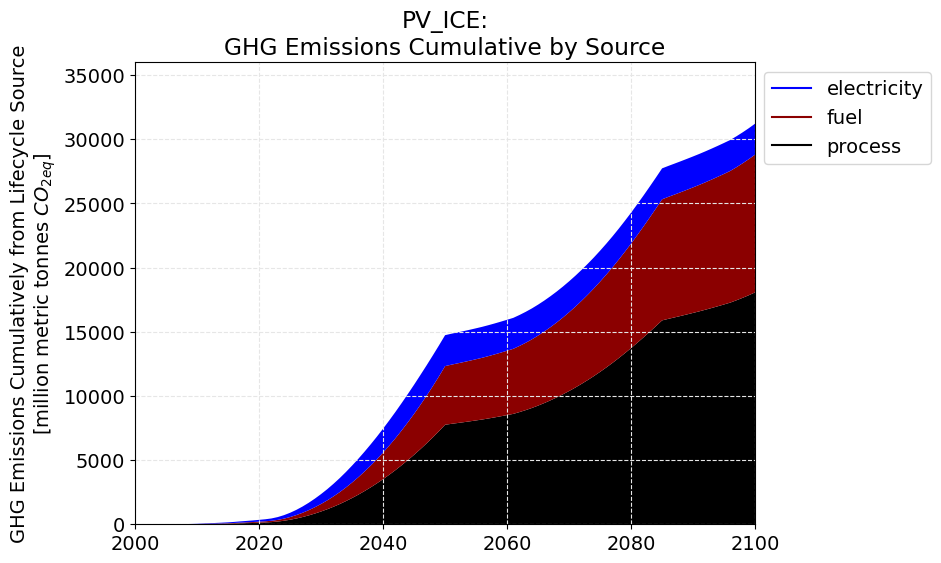

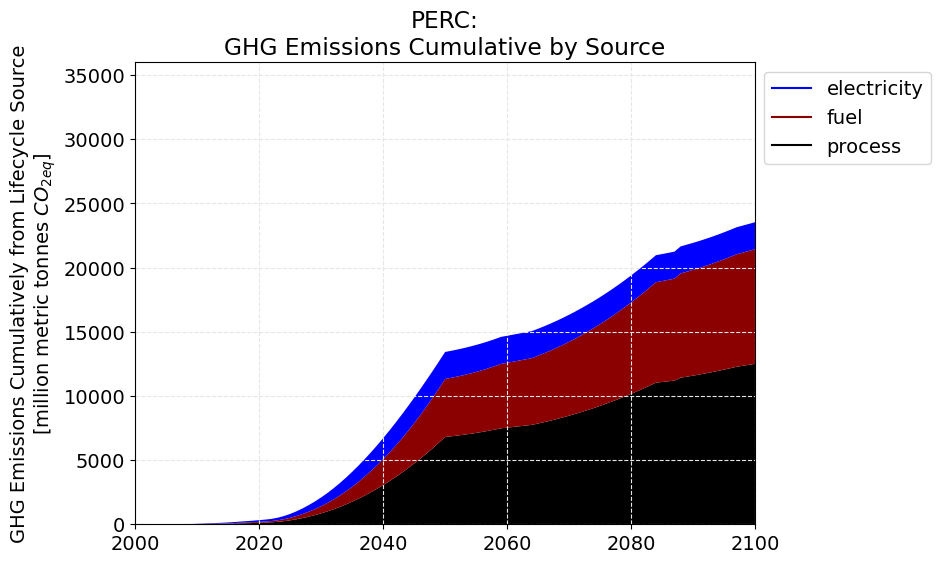

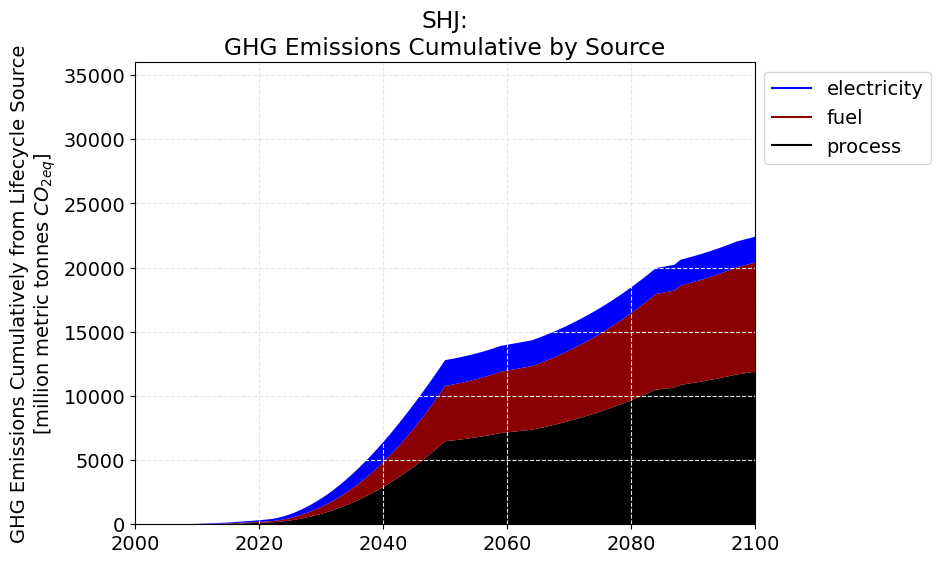

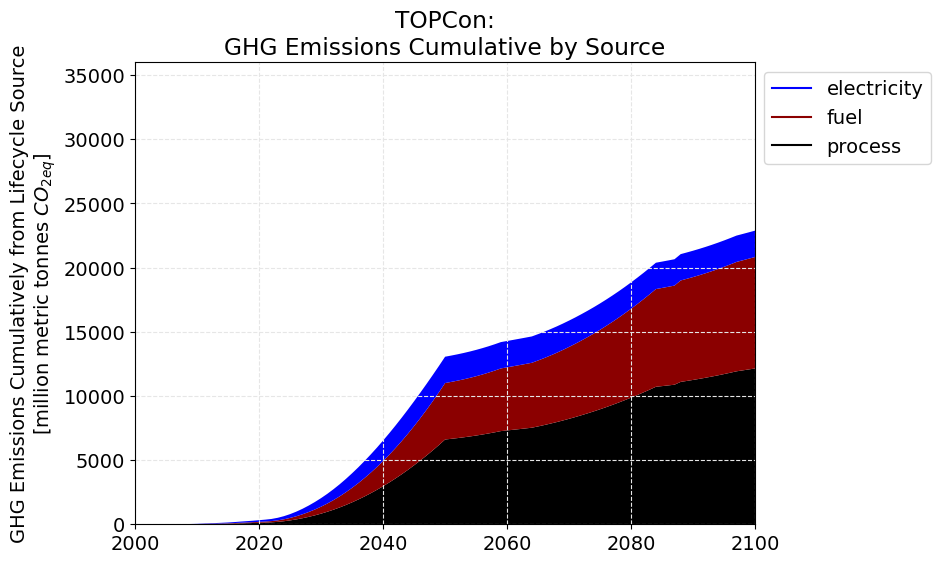

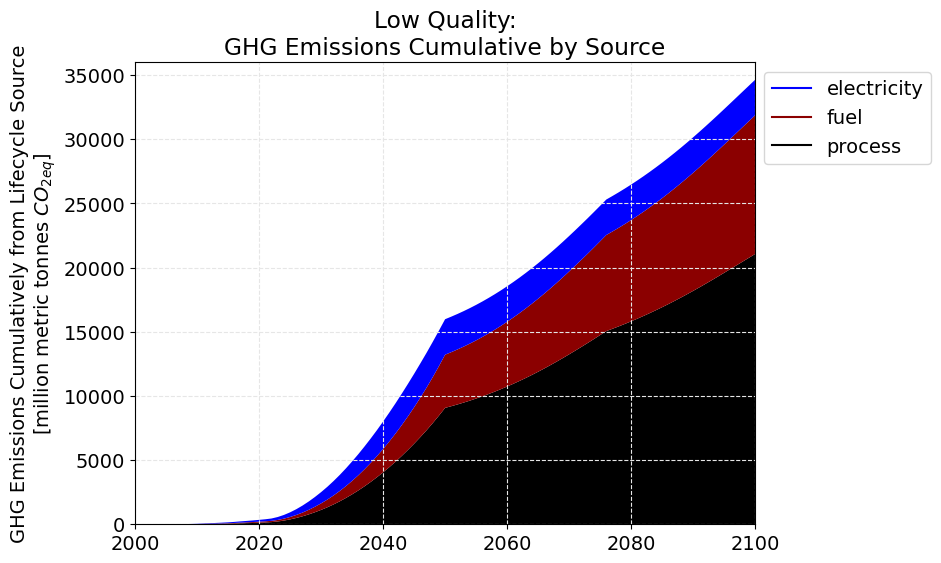

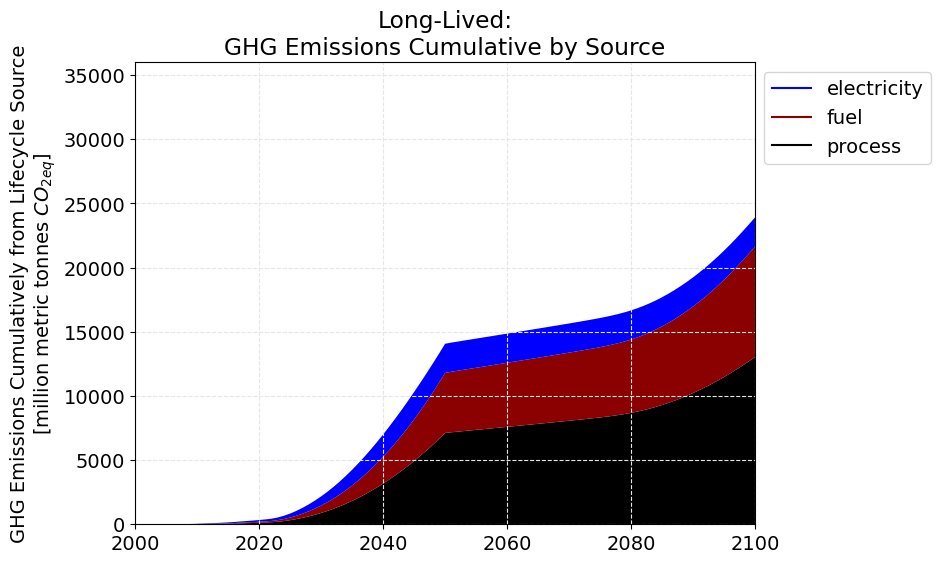

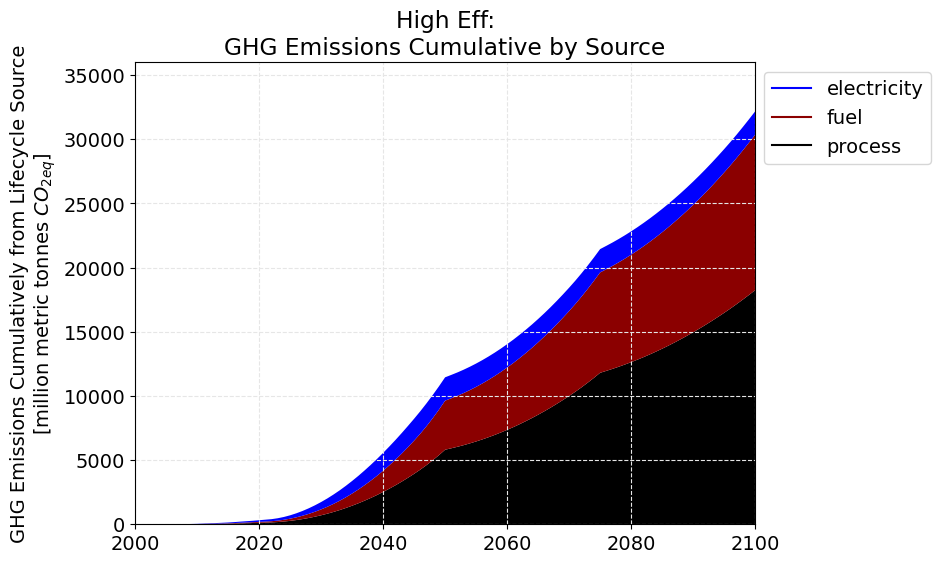

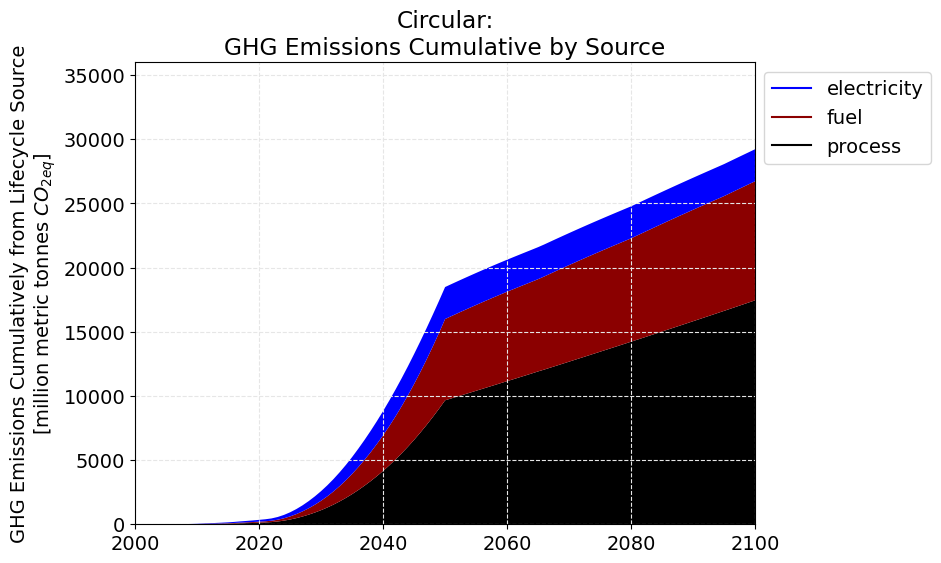

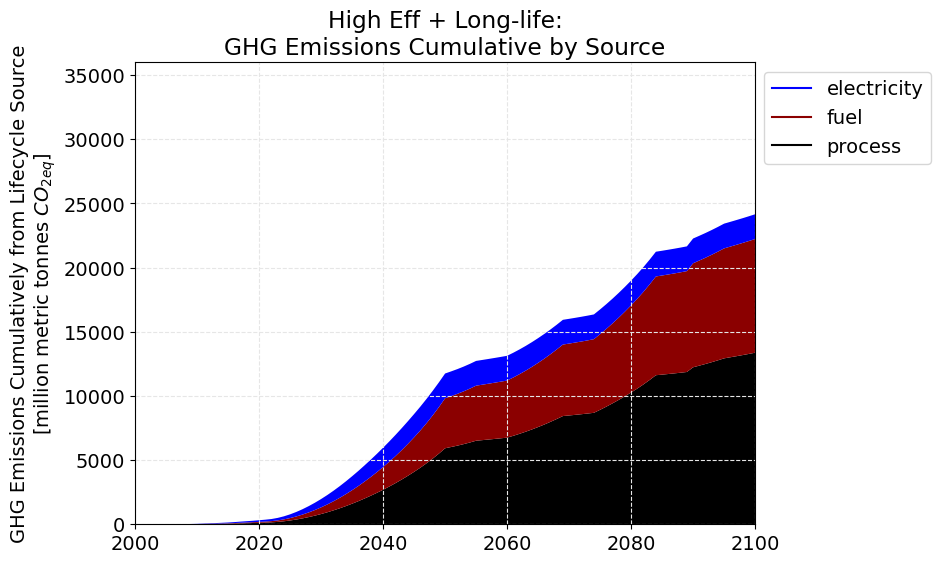

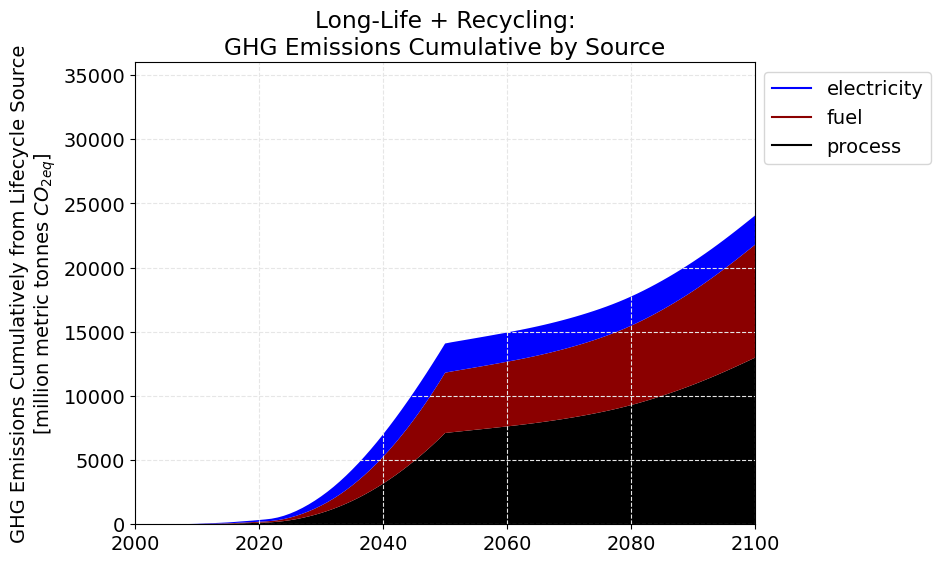

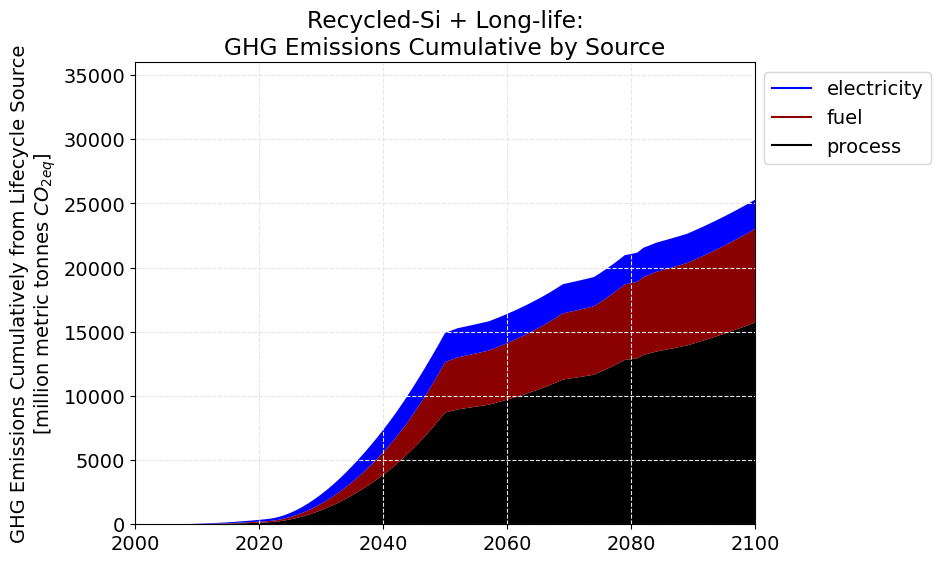

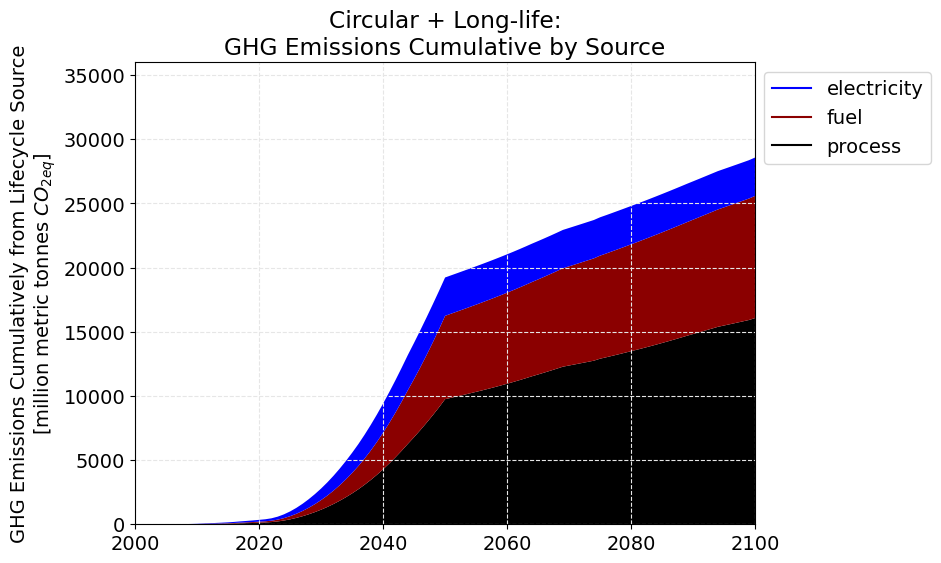

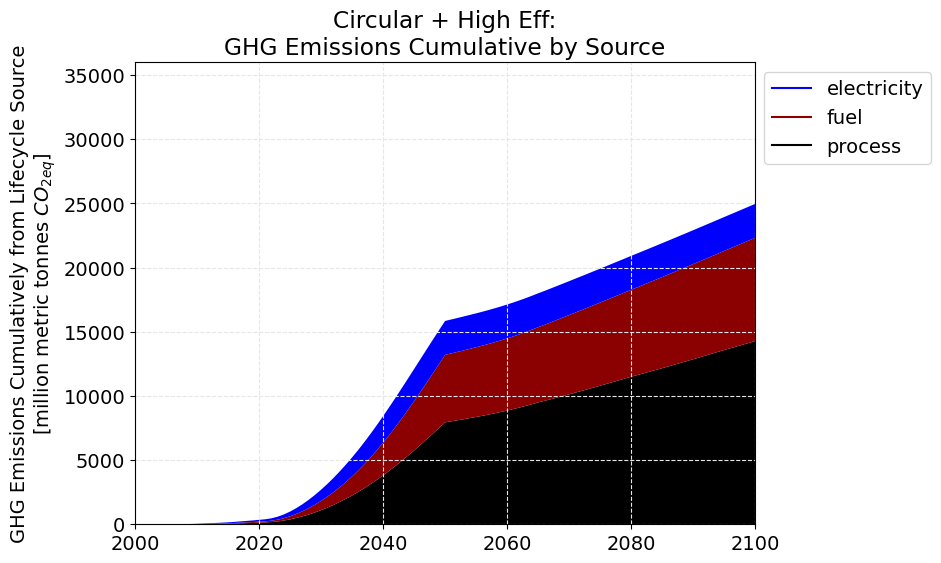

In [56]:
#graphing by emission source, cumulative

for scen in scennames_labels_flat:
    
    plt.plot([],[],color='black', label='process')
    plt.plot([],[],color='darkred', label='fuel')
    plt.plot([],[],color='blue', label='electricity')

    plt.stackplot(elec_emissions_cumu.index,
                  process_emissions_cumu[scen]/1e12, 
                  fuel_emissions_cumu[scen]/1e12,
                  elec_emissions_cumu[scen]/1e12, 
                  colors = ['black','darkred','blue'])
    plt.title(scen+':\nGHG Emissions Cumulative by Source')
    plt.ylabel('GHG Emissions Cumulatively from Lifecycle Source\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,maxy+1000)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3,1))
    plt.grid(axis='both', which='both', color='0.9', ls='--')
#plt.legend()
    plt.show()

In [57]:
#bar chart 2050 and 2100 by scenario by emission source
emit_efp_2100_forbar = pd.concat([elec_emissions_cumu.loc[2100],fuel_emissions_cumu.loc[2100],process_emissions_cumu.loc[2100]],
                                 axis=1,keys=['electricity','fuel','process'])

In [58]:
emit_efp_2100_mmt = emit_efp_2100_forbar/1e12

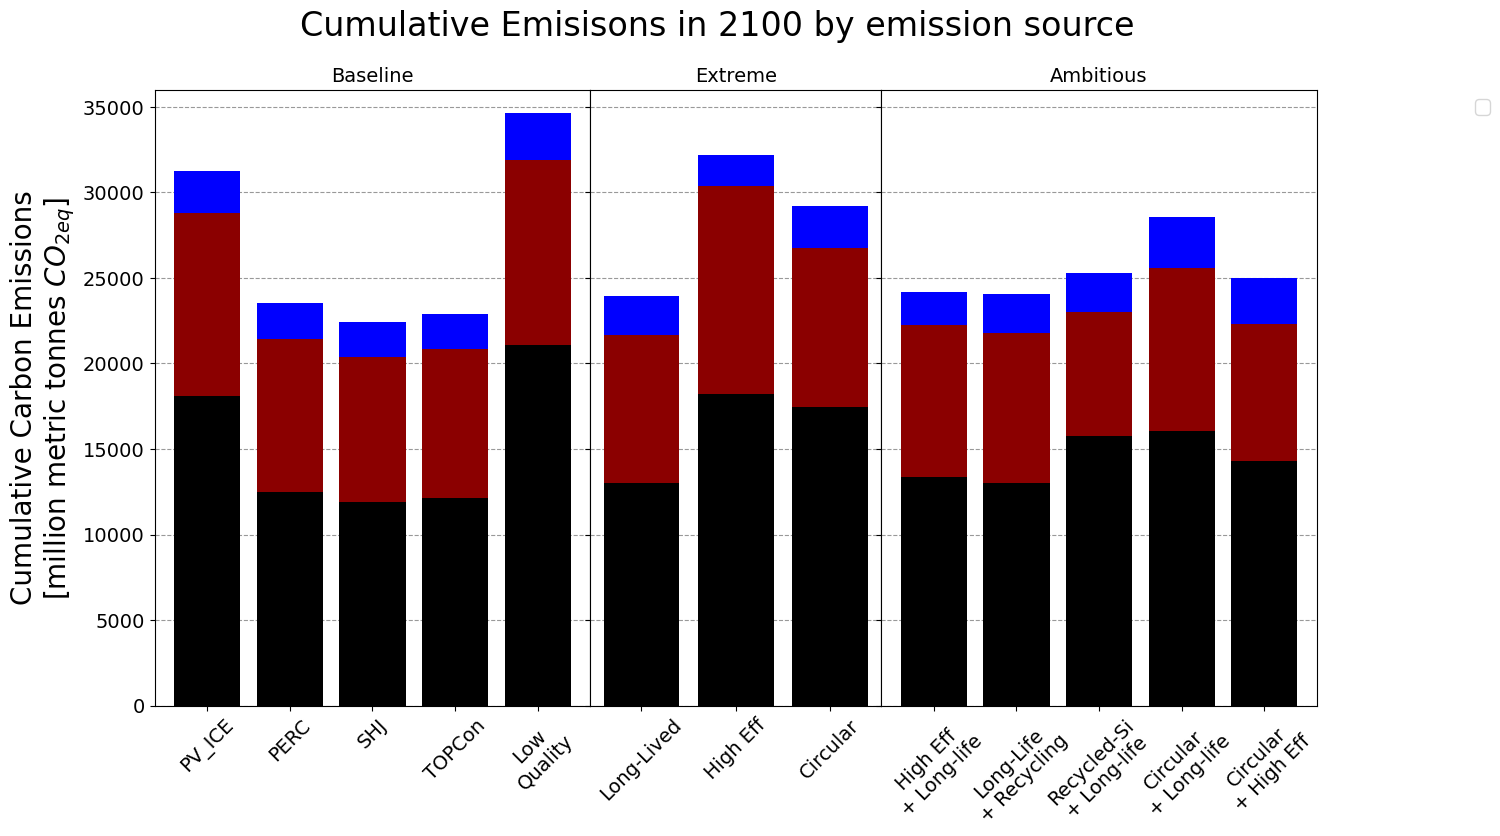

In [59]:

fig_cumulativeemit, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['process'].iloc[0:5],label='process',
        tick_label=scennames_labels[0:5], color='black')

ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['fuel'].iloc[0:5],label='fuel',
        bottom=emit_efp_2100_mmt['process'].iloc[0:5], 
        tick_label=scennames_labels[0:5], color='darkred')

ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['electricity'].iloc[0:5],label='electricity',
        bottom=emit_efp_2100_mmt['process'].iloc[0:5]+emit_efp_2100_mmt['fuel'].iloc[0:5],
        tick_label=scennames_labels[0:5], color='blue')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['process'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='black')

ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['fuel'].iloc[5:8],
        bottom=emit_efp_2100_mmt['process'].iloc[5:8], 
        tick_label=scennames_labels[5:8], color='darkred')

ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['electricity'].iloc[5:8],
        bottom=emit_efp_2100_mmt['process'].iloc[5:8]+emit_efp_2100_mmt['fuel'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='blue')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['process'].iloc[8:],
        tick_label=scennames_labels[8:], color='black')

ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['fuel'].iloc[8:],
        bottom=emit_efp_2100_mmt['process'].iloc[8:], 
        tick_label=scennames_labels[8:], color='darkred')

ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['electricity'].iloc[8:],
        bottom=emit_efp_2100_mmt['process'].iloc[8:]+emit_efp_2100_mmt['fuel'].iloc[8:],
        tick_label=scennames_labels[8:], color='blue')

ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig
fig_cumulativeemit.suptitle('Cumulative Emisisons in 2100 by emission source', fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.42,1))
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# vMFG versus Circular Processes
3 categories for this:
- vmfg of materials
- CE of materials and materials
- install/decomission requirements 
and I think module mfging falls into the last category

In [60]:
CEkey = ['ReMFG','Recycle_Crush','Recycled_LQ','Recycled_HQ','Resell','Repair','LQ','HQ']
CEkey_search = '|'.join(CEkey)

LinearKey = ['vMFG', 'vmfg', 'landfill']
LinearKey_search = '|'.join(LinearKey)

otherkey = ['mod_MFG','OandM','Install','Demount', 'Store'] #THIS ONE IS MISSING COLUMNS!!!
otherkey_search = '|'.join(otherkey)

scen_carbon_CE.columns

scen_carbon_linear.columns

scen_carbon_other.columns

allcolumns = list(scen_annual_carbon.columns)
selectedcolumns = list(scen_carbon_other.columns)+list(scen_carbon_linear.columns)+list(scen_carbon_CE.columns)
selectedcolumns

set(allcolumns).difference(selectedcolumns)

In [61]:
#subset by pathways
sim_carbon_CE = pd.DataFrame()
sim_carbon_linear = pd.DataFrame()
sim_carbon_necessary = pd.DataFrame()

for scen in scenarios:
    scen_annual_carbon = sim_annual_carbon.filter(like=scen)
    
    scen_carbon_CE = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(CEkey_search)]
    scen_carbon_CE_sum = scen_carbon_CE.sum(axis=1)
    sim_carbon_CE = pd.concat([sim_carbon_CE, scen_carbon_CE_sum], axis=1)
    
    scen_carbon_linear = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(LinearKey_search)]
    scen_carbon_linear_sum = scen_carbon_linear.sum(axis=1)
    sim_carbon_linear = pd.concat([sim_carbon_linear,scen_carbon_linear_sum ], axis=1)
    
    scen_carbon_other = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(otherkey_search)]
    scen_carbon_other_sum = scen_carbon_other.sum(axis=1)
    sim_carbon_necessary = pd.concat([sim_carbon_necessary, scen_carbon_other_sum], axis=1)
    
sim_carbon_CE.columns = scennames_labels_flat
sim_carbon_linear.columns = scennames_labels_flat
sim_carbon_necessary.columns = scennames_labels_flat

#.index = pd.RangeIndex(start=2000,stop=2101,step=1)

In [62]:
sim_carbon_CE_cumu = sim_carbon_CE.cumsum()
sim_carbon_linear_cumu = sim_carbon_linear.cumsum()
sim_carbon_necessary_cumu = sim_carbon_necessary.cumsum()

In [63]:
emit_pathway = pd.concat([sim_carbon_CE_cumu.loc[2100],sim_carbon_linear_cumu.loc[2100],sim_carbon_necessary_cumu.loc[2100]],
                                 axis=1,keys=['Circular','Linear/Virgin','Necessary'])
emit_pathway_mmt = emit_pathway/1e12

In [64]:
sim_carbon_CE_cumu

PV_ICE          PERC           SHJ        TOPCon   Low Quality  \
2000  1.243800e+08  1.081060e+08  1.038402e+08  1.059533e+08  1.243800e+08   
2001  1.671031e+08  1.557593e+08  1.527859e+08  1.542588e+08  1.671031e+08   
2002  2.168491e+08  2.022509e+08  1.984243e+08  2.003199e+08  2.168491e+08   
2003  2.898076e+08  2.704357e+08  2.653579e+08  2.678733e+08  2.898039e+08   
2004  4.327494e+08  4.040232e+08  3.964934e+08  4.002235e+08  4.327160e+08   
...            ...           ...           ...           ...           ...   
2096  9.539486e+12  1.572654e+15  1.496090e+15  1.527872e+15  2.928479e+15   
2097  9.675062e+12  1.600409e+15  1.522484e+15  1.554830e+15  3.004928e+15   
2098  9.822367e+12  1.612298e+15  1.533791e+15  1.566378e+15  3.081722e+15   
2099  9.981563e+12  1.624441e+15  1.545339e+15  1.578173e+15  3.158052e+15   
2100  1.015567e+13  1.636941e+15  1.557226e+15  1.590313e+15  3.234435e+15   

        Long-Lived      High Eff      Circular  High Eff + Long-life  \
2000  1.159678e+08  1.034222e+08  1.243800e+08          1.034222e+08   
2001  1.612394e+08  1.524945e+08  1.671031e+08          1.524945e+08   
2002  2.093032e+08  1.980494e+08  2.168491e+08          1.980494e+08   
2003  2.797941e+08  2.648604e+08  2.898076e+08          2.648604e+08   
2004  4.179006e+08  3.957556e+08  4.327494e+08          3.957556e+08   
...            ...           ...           ...                   ...   
2096  4.351846e+10  4.124516e+10  1.891092e+15          4.124516e+10   
2097  4.351846e+10  4.124516e+10  1.915260e+15          4.124516e+10   
2098  4.351846e+10  4.124516e+10  1.939886e+15          4.124516e+10   
2099  4.351846e+10  4.124516e+10  1.965012e+15          4.124516e+10   
2100  4.351846e+10  4.124516e+10  1.990659e+15          4.124516e+10   

      Long-Life + Recycling  Recycled-Si + Long-life  Circular + Long-life  \
2000           1.159678e+08             1.243800e+08          1.243800e+08   
2001           1.612394e+08             1.671031e+08          1.671031e+08   
2002           2.093032e+08             2.168491e+08          2.168491e+08   
2003           2.797941e+08             2.898076e+08          2.898076e+08   
2004           4.179006e+08             4.327494e+08          4.327494e+08   
...                     ...                      ...                   ...   
2096           2.039541e+14             2.132475e+15          1.053968e+15   
2097           2.163023e+14             2.189139e+15          1.061585e+15   
2098           2.289145e+14             2.247841e+15          1.069560e+15   
2099           2.417305e+14             2.310527e+15          1.078012e+15   
2100           2.546701e+14             2.376743e+15          1.103442e+15   

      Circular + High Eff  
2000         1.243800e+08  
2001         1.671031e+08  
2002         2.168491e+08  
2003         2.898076e+08  
2004         4.327494e+08  
...                   ...  
2096         1.133206e+15  
2097         1.150338e+15  
2098         1.167897e+15  
2099         1.185921e+15  
2100         1.204432e+15  

[101 rows x 13 columns]

In [65]:
#emit_pathway.sum(axis=1) #check that matches, we're good
emit_pathway_mmt

Circular  Linear/Virgin   Necessary
PV_ICE                     10.155668   31120.772260   86.608227
PERC                     1636.940661   21822.705428   79.515163
SHJ                      1557.226082   20775.190175   75.719958
TOPCon                   1590.313497   21213.448951   77.296139
Low Quality              3234.435383   31299.032127  101.376302
Long-Lived                  0.043518   23835.410129   81.124405
High Eff                    0.041245   32104.970553   64.810270
Circular                 1990.658556   27109.689826  123.840121
High Eff + Long-life        0.041245   24088.051476   68.646302
Long-Life + Recycling     254.670083   23729.248991   81.610618
Recycled-Si + Long-life  2376.743165   22818.877453  302.010424
Circular + Long-life     1103.442337   27358.368883  117.086784
Circular + High Eff      1204.432432   23655.330846  105.292637

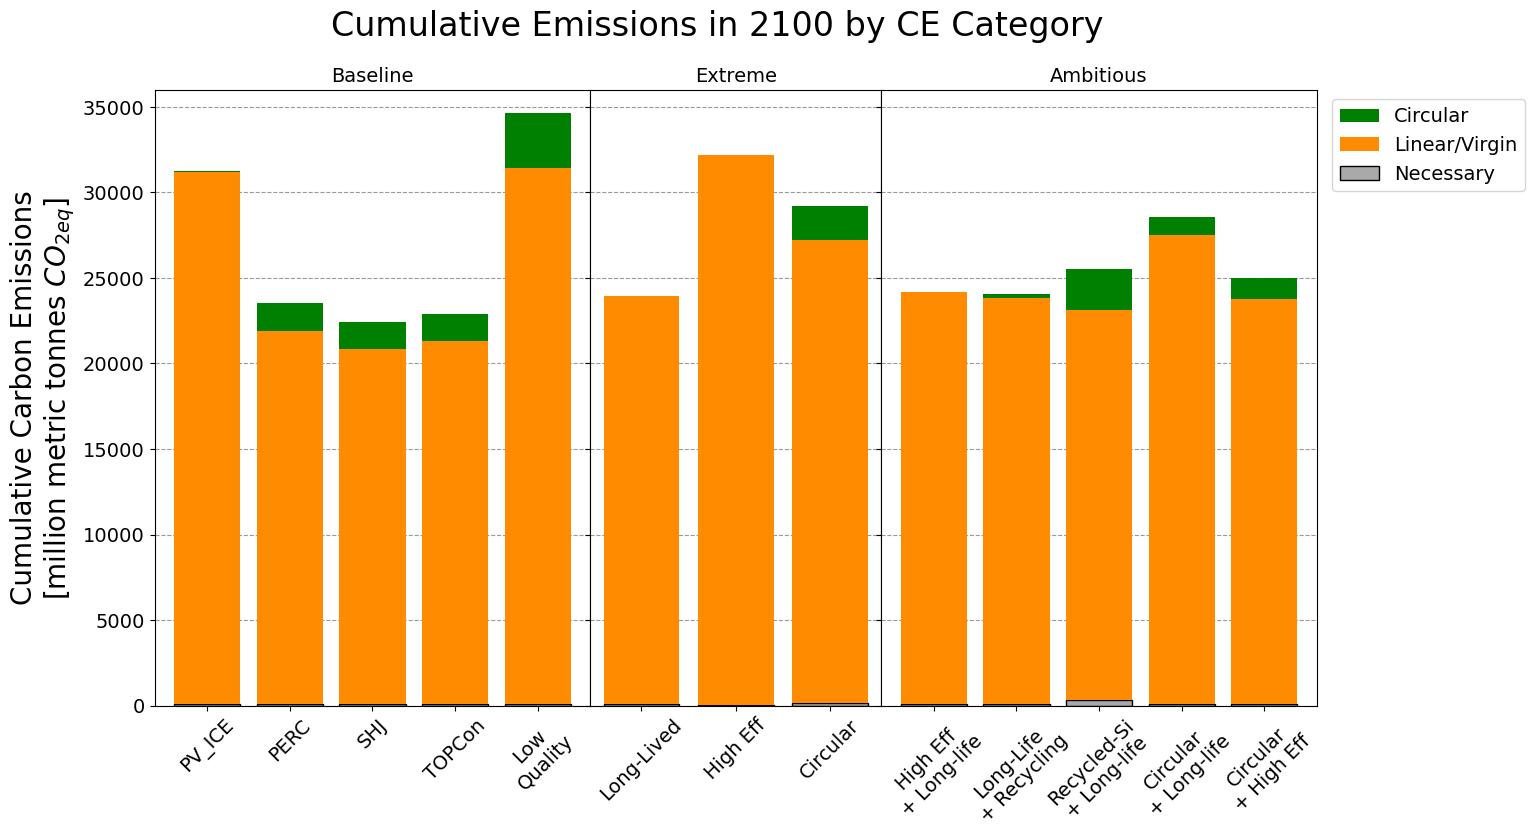

In [66]:

fig_emitByPathway, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Necessary'].iloc[0:5],label='Necessary',
        tick_label=scennames_labels[0:5], color='darkgray', edgecolor='black')

ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Linear/Virgin'].iloc[0:5],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[0:5], 
        tick_label=scennames_labels[0:5], color='darkorange')

ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Circular'].iloc[0:5],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[0:5]+emit_pathway_mmt['Linear/Virgin'].iloc[0:5],
        tick_label=scennames_labels[0:5], color='green')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Necessary'].iloc[5:8],label='Necessary',
        tick_label=scennames_labels[5:8], color='darkgray', edgecolor='black')

ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Linear/Virgin'].iloc[5:8],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[5:8], 
        tick_label=scennames_labels[5:8], color='darkorange')

ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Circular'].iloc[5:8],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[5:8]+emit_pathway_mmt['Linear/Virgin'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='green')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Necessary'].iloc[8:],label='Necessary',
        tick_label=scennames_labels[8:], color='darkgray', edgecolor='black')

ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Linear/Virgin'].iloc[8:],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[8:], 
        tick_label=scennames_labels[8:], color='darkorange')

ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Circular'].iloc[8:],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[8:]+emit_pathway_mmt['Linear/Virgin'].iloc[8:],
        tick_label=scennames_labels[8:], color='green')

ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig
fig_emitByPathway.suptitle('Cumulative Emissions in 2100 by CE Category', fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.5,1))
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# Emissions per Capacity
Trying to quantify the emissions entailed in achieving energy transition target capacities. Our current calculations don't allow a good method of CO2/kWh, but we do know how much it now takes to achieve the first 75 TW then the the next 11 TW will entail a different amount of carbon. This may be a valuable comparison

In [67]:

cumu_carbon_rankings_crittime#.loc[scen,2050]

2050          2100
PV_ICE                   14734.887647  31217.536154
PERC                     13425.686405  23539.161252
SHJ                      12788.748505  22408.136215
TOPCon                   13056.439838  22881.058587
Low Quality              15978.784614  34634.843812
Long-Lived               14065.988686  23916.578052
High Eff                 11451.323288  32169.822068
Circular                 18486.218292  29224.188502
High Eff + Long-life     11748.078154  24156.739023
Long-Life + Recycling    14086.068035  24065.529692
Recycled-Si + Long-life  15113.824728  25497.631042
Circular + Long-life     19230.512627  28578.898004
Circular + High Eff      15843.882694  24965.055916

In [68]:
cumu_carbon_rankings_crittime.index = scenarios #relabel the index for the calc
scen_carbonPERcapacity = pd.DataFrame(index=scenarios)
for scen in scenarios:
    #2050
    scen_effectiveCap_TW = sim1.scenario[scen].dataOut_m.loc[50, 'Effective_Capacity_[W]']/1e12
    scen_carbon_mmt = cumu_carbon_rankings_crittime.loc[scen,2050]
    scen_carbonPERcapacity.loc[scen, 'EffectiveCap_TW_2050'] = scen_effectiveCap_TW
    scen_carbonPERcapacity.loc[scen, 'Carbon_mmt_2050'] = scen_carbon_mmt
    scen_carbonPERcapacity.loc[scen, 'CO2pTW_2050'] = scen_carbon_mmt/scen_effectiveCap_TW
    #2100
    scen_effectiveCap_TW_2100 = sim1.scenario[scen].dataOut_m.loc[100, 'Effective_Capacity_[W]']/1e12
    scen_carbon_mmt_2100 = cumu_carbon_rankings_crittime.loc[scen,2100]
    scen_carbonPERcapacity.loc[scen, 'EffectiveCap_TW_2100'] = scen_effectiveCap_TW_2100
    scen_carbonPERcapacity.loc[scen, 'Carbon_mmt_2100'] = scen_carbon_mmt_2100
    scen_carbonPERcapacity.loc[scen, 'CO2pTW_2100'] = scen_carbon_mmt_2100/scen_effectiveCap_TW_2100
    #marginal increase between 2050 and 2100

In [69]:
round(scen_carbonPERcapacity,0)

EffectiveCap_TW_2050  Carbon_mmt_2050  CO2pTW_2050  \
PV_ICE                             75.0          14735.0        196.0   
r_PERC                             75.0          13426.0        179.0   
r_SHJ                              75.0          12789.0        171.0   
r_TOPCon                           75.0          13056.0        174.0   
r_IRENA                            75.0          15979.0        213.0   
ex_Life                            75.0          14066.0        188.0   
ex_High_eff                        75.0          11451.0        153.0   
ex_Circular                        75.0          18486.0        246.0   
h_EffLife                          75.0          11748.0        157.0   
h_50PERC                           75.0          14086.0        188.0   
h_RecycledPERC                     75.0          15114.0        202.0   
h_Perovskite_life                  75.0          19231.0        256.0   
h_Perovskite_Eff                   75.0          15844.0        211.0   

                   EffectiveCap_TW_2100  Carbon_mmt_2100  CO2pTW_2100  
PV_ICE                             86.0          31218.0        363.0  
r_PERC                             86.0          23539.0        274.0  
r_SHJ                              86.0          22408.0        261.0  
r_TOPCon                           86.0          22881.0        266.0  
r_IRENA                            86.0          34635.0        403.0  
ex_Life                            86.0          23917.0        278.0  
ex_High_eff                        86.0          32170.0        374.0  
ex_Circular                        86.0          29224.0        340.0  
h_EffLife                          86.0          24157.0        281.0  
h_50PERC                           86.0          24066.0        280.0  
h_RecycledPERC                     86.0          25498.0        297.0  
h_Perovskite_life                  86.0          28579.0        332.0  
h_Perovskite_Eff                   86.0          24965.0        290.0